# OCT etc guide

this guide runs through the key functions used in the extraction of text from the price change letter pdf files as an introduction to their use

# Converting PDF to image

In [3]:
from pdf2image import convert_from_bytes # used to convert pdf to an image

letters_location =  'Z:/Proofing_Project/example_letters/'
file = '210442-155654G-RNNC_SVT_PROOF_Batch_001_PROOFS.P001.PDF'

page_images = convert_from_bytes(open(letters_location+file, 'rb').read())
# returns a list of images in PIL format (related to pillow I believe), one for each page
page_images

FileNotFoundError: [Errno 2] No such file or directory: 'Z:/Proofing_Project/example_letters/210442-155654G-RNNC_SVT_PROOF_Batch_001_PROOFS.P001.PDF'

In [7]:
location = 'C:/Users/u344260/pythonvenvs/blade_imaging/BOOKING-FORM-NORMAL-7.10.21.pdf'
page_images = convert_from_bytes(open(location, 'rb').read())

PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?

In [2]:
# images like this can be viewed in juptyer notebooks by calling indivudal image:

page_images[4]

NameError: name 'page_images' is not defined

# Using Tesseract for text extraction

In [7]:
# Tesseract has to be downloaded. It can be found from https://github.com/UB-Mannheim/tesseract/wiki

import pytesseract                                          # used to scan image for text

# pytesseract point to your local install (after being imported). The path to your local install needs to be defined:
pytesseract.pytesseract.tesseract_cmd = r'C:/Users/U344260/AppData/Local/Programs/Tesseract-OCR/tesseract.exe'


# tesseract is run by:
page_text = pytesseract.image_to_string(page_images[4])

print(page_text)

# calling print on the text keeps a lot of formatting. Call display to see formatting characters
# display(page_text)

ST_N_ST_001_CS_BDM/GS_N_ST_001_CS_BDM 1

22nd February 2021

 

SCOTTISHPOWER ‘

 

 

 

Your account details
Account number:
61069799020
Tariff:
Standard
Mr Chung Payment method:
19 Alexandra Street | ;
Kirkintilloch Monthly Direct Debit
Glasgow
G66 1HE
1/2/000001 /0011868748/SVT_L1

Supply address: 19 Alexandra Street, Kirkintilloch, Glasgow, G66 1HE

Your energy prices are increasing - let us explain why

Dear Mr Chung,

Your energy prices are set to go up from 1st April 2021. Ofgem, the energy
regulator, sets the price cap every six months. They decide the maximum amount
that energy suppliers like us can charge for your energy. As you're on a Standard
variable tariff, your prices can go up or down depending on the price cap. This
helps to make sure you're always paying a fair price.

So, how will this affect you?

We estimate your annual energy costs will change as follows:

Your gas costs: £40 more per year

Your electricity costs: £50 more per year

Please turn over for more inf

# Image manipluation

In [8]:
# Require numpy and cv2 for this

import cv2
import numpy as np

In [20]:
# converting image to a numpy array is the first step in most things here

page_image = np.array(page_images[4])

# this creates a 3D array of x and y coordinates of each pixel and their RGB vales where each value ranges from 0 to 255
# (255,255,255) = white
# (0,0,0) = black
# (0,255,0) = green

page_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

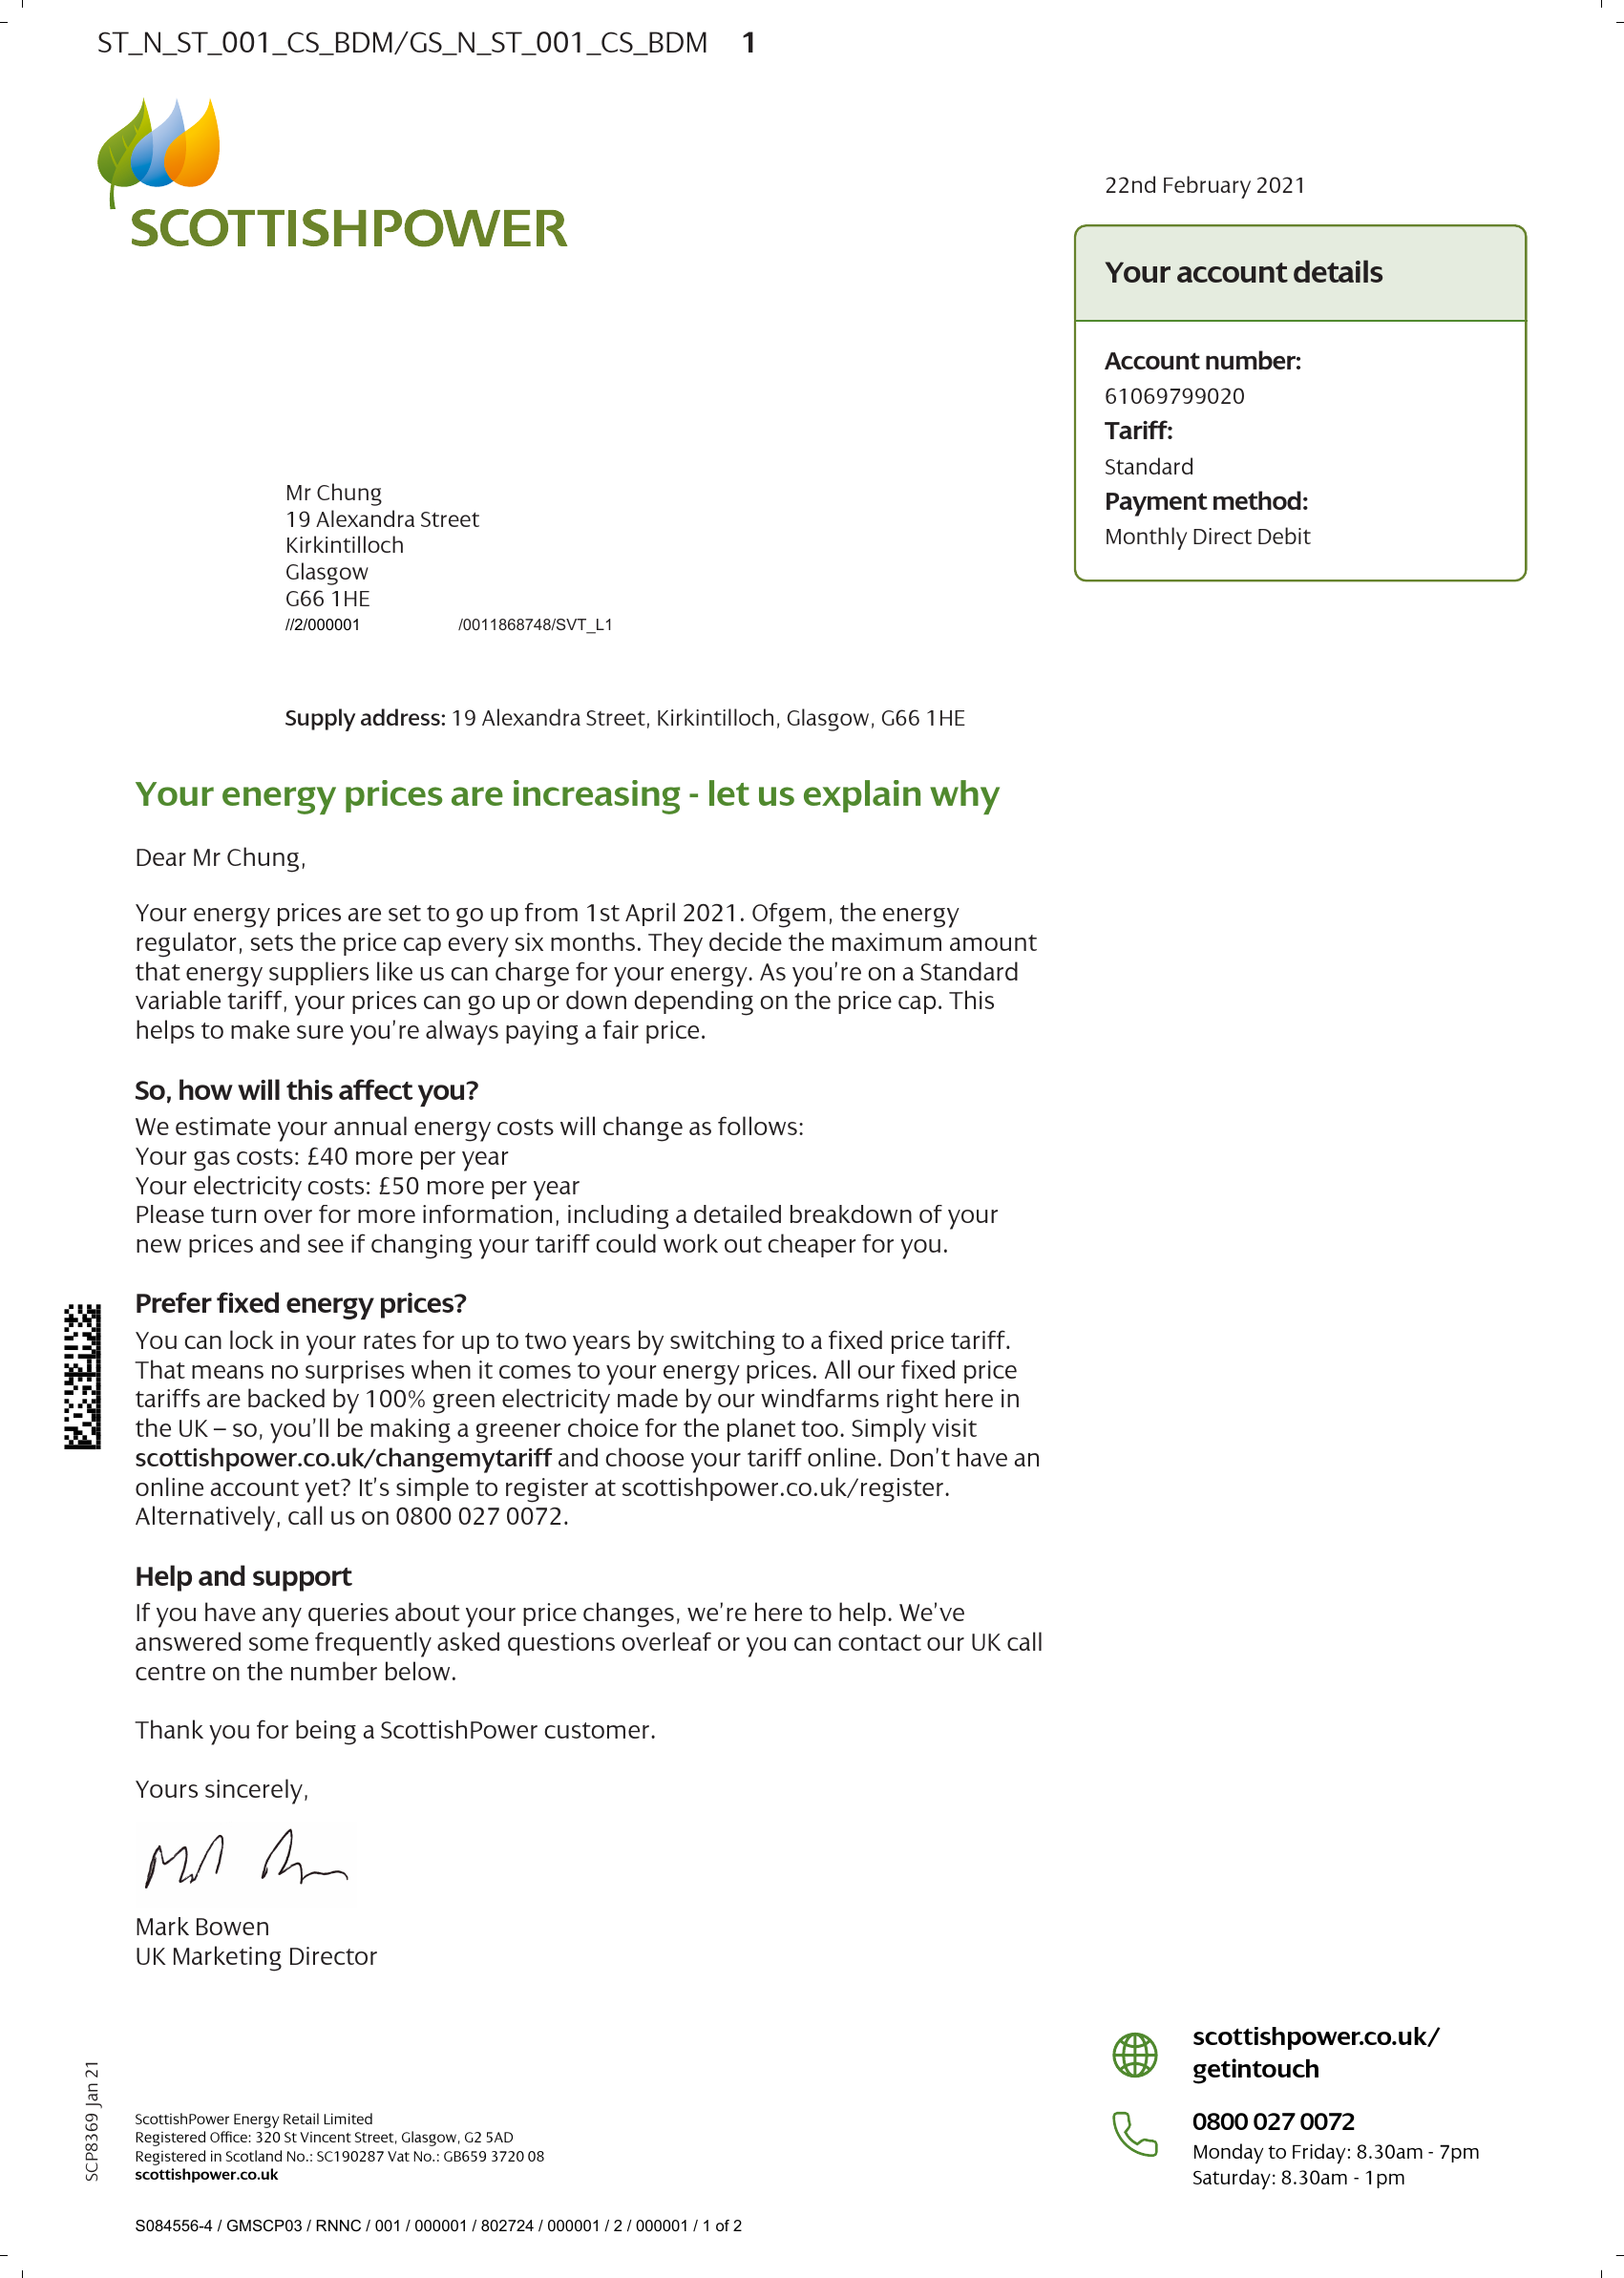

In [22]:
# numpy arrays can be returned as PIL images by:

from PIL import Image

Image.fromarray(page_image)

## pixel analysis

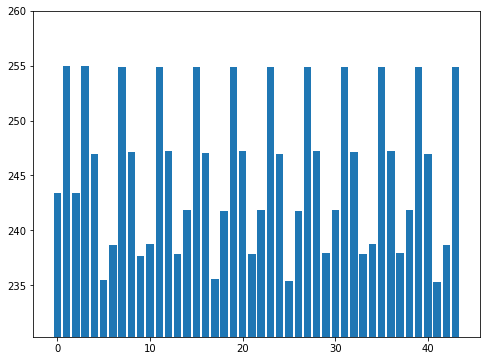

In [13]:
# blank pages can be idenfied by average pixel value:
# Almost all pixels on blank page (white page) are (255,255,255). each blank page as some text but not much

import matplotlib.pyplot as plt

page_pixel_means = [np.mean(image) for image in page_images]

plt.figure(figsize=(8,6))
plt.bar([x for x in range(len(page_pixel_means))], page_pixel_means)
plt.ylim(min(page_pixel_means)-5, max(page_pixel_means)+5)
plt.show()

## exporting an image

In [27]:
# If you want to view an image created it can be exported by:
img = np.array(page_images[4])
cv2.imwrite("Letter_RMR/img.png", img)

True

## working with specific section of image

In [19]:
# a box can be created around a bit of an image by identifying the top left corner of the box and it's height and width

x,y,w,h = 1120,230,490,380

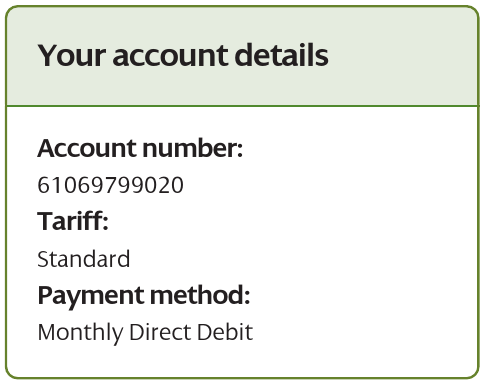

In [24]:
# we can then pick out that part:

focused = img[y:y+h, x:x+w]

Image.fromarray(focused)

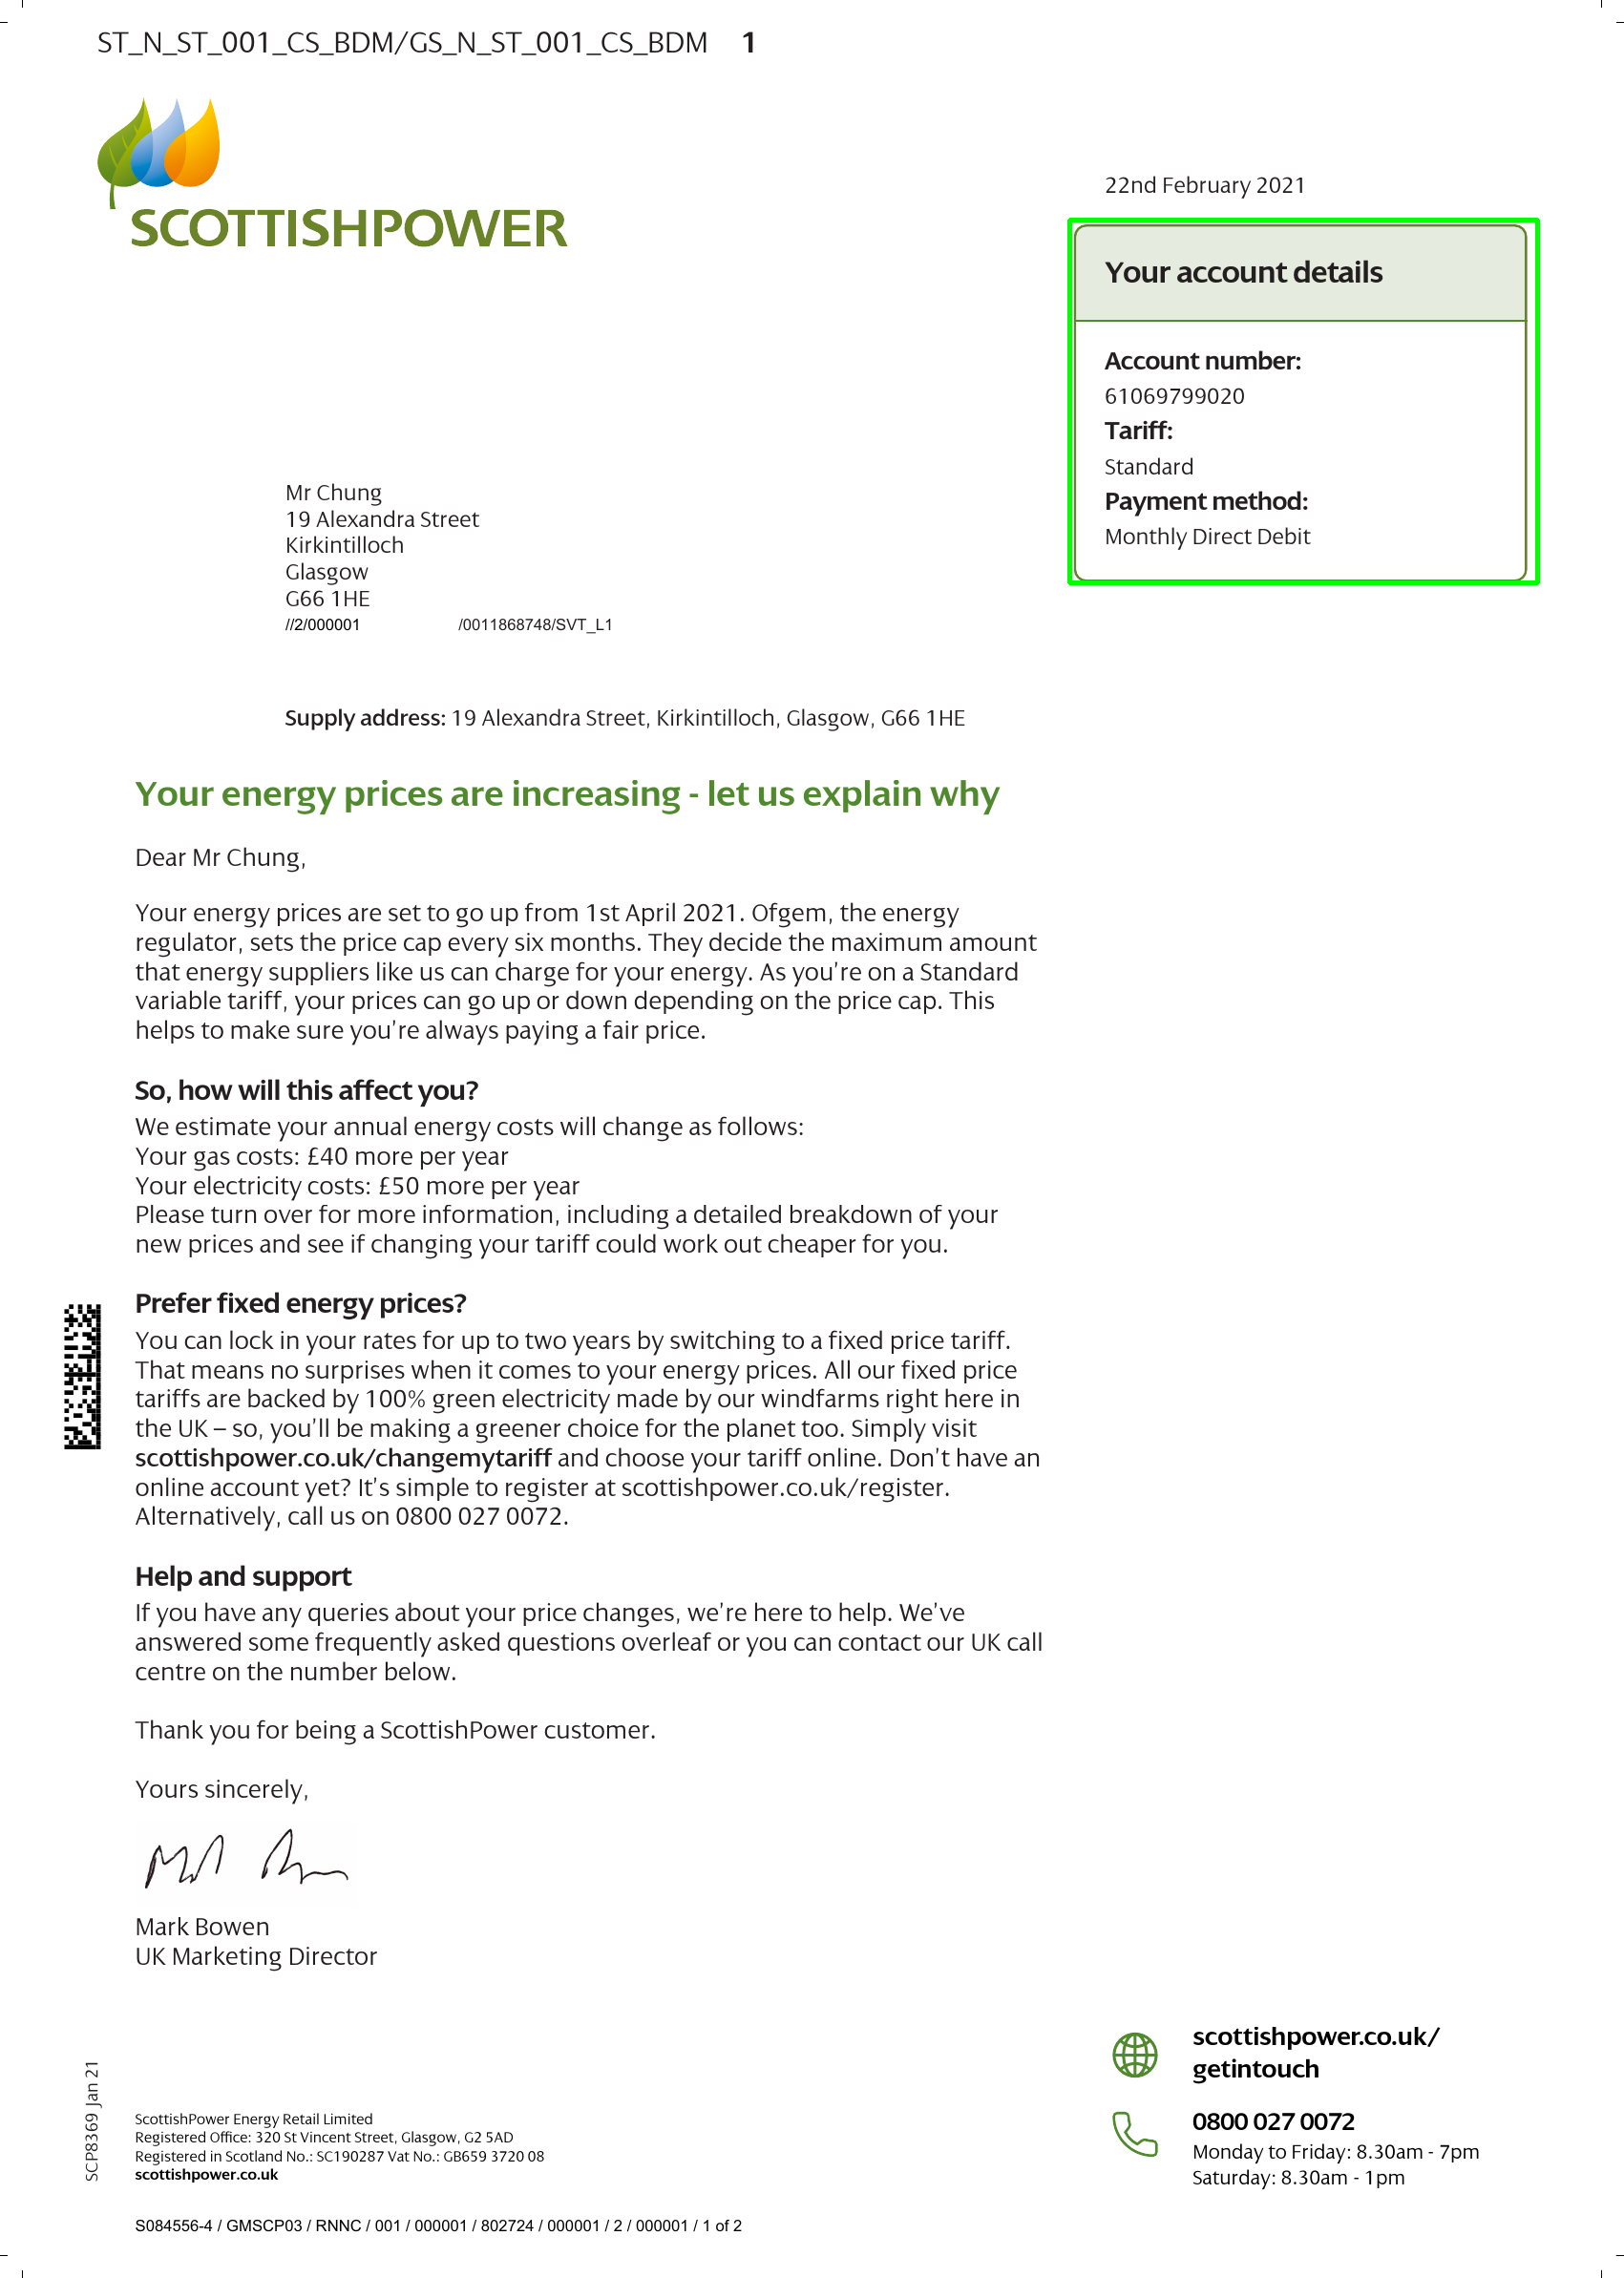

In [28]:
# we could draw the box on the original image:

boxed = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)

# cv2.rectangle arguements (image, top left corner, bottom right corner, colour, draw style (3 = outline, -1 = fill))

Image.fromarray(boxed)

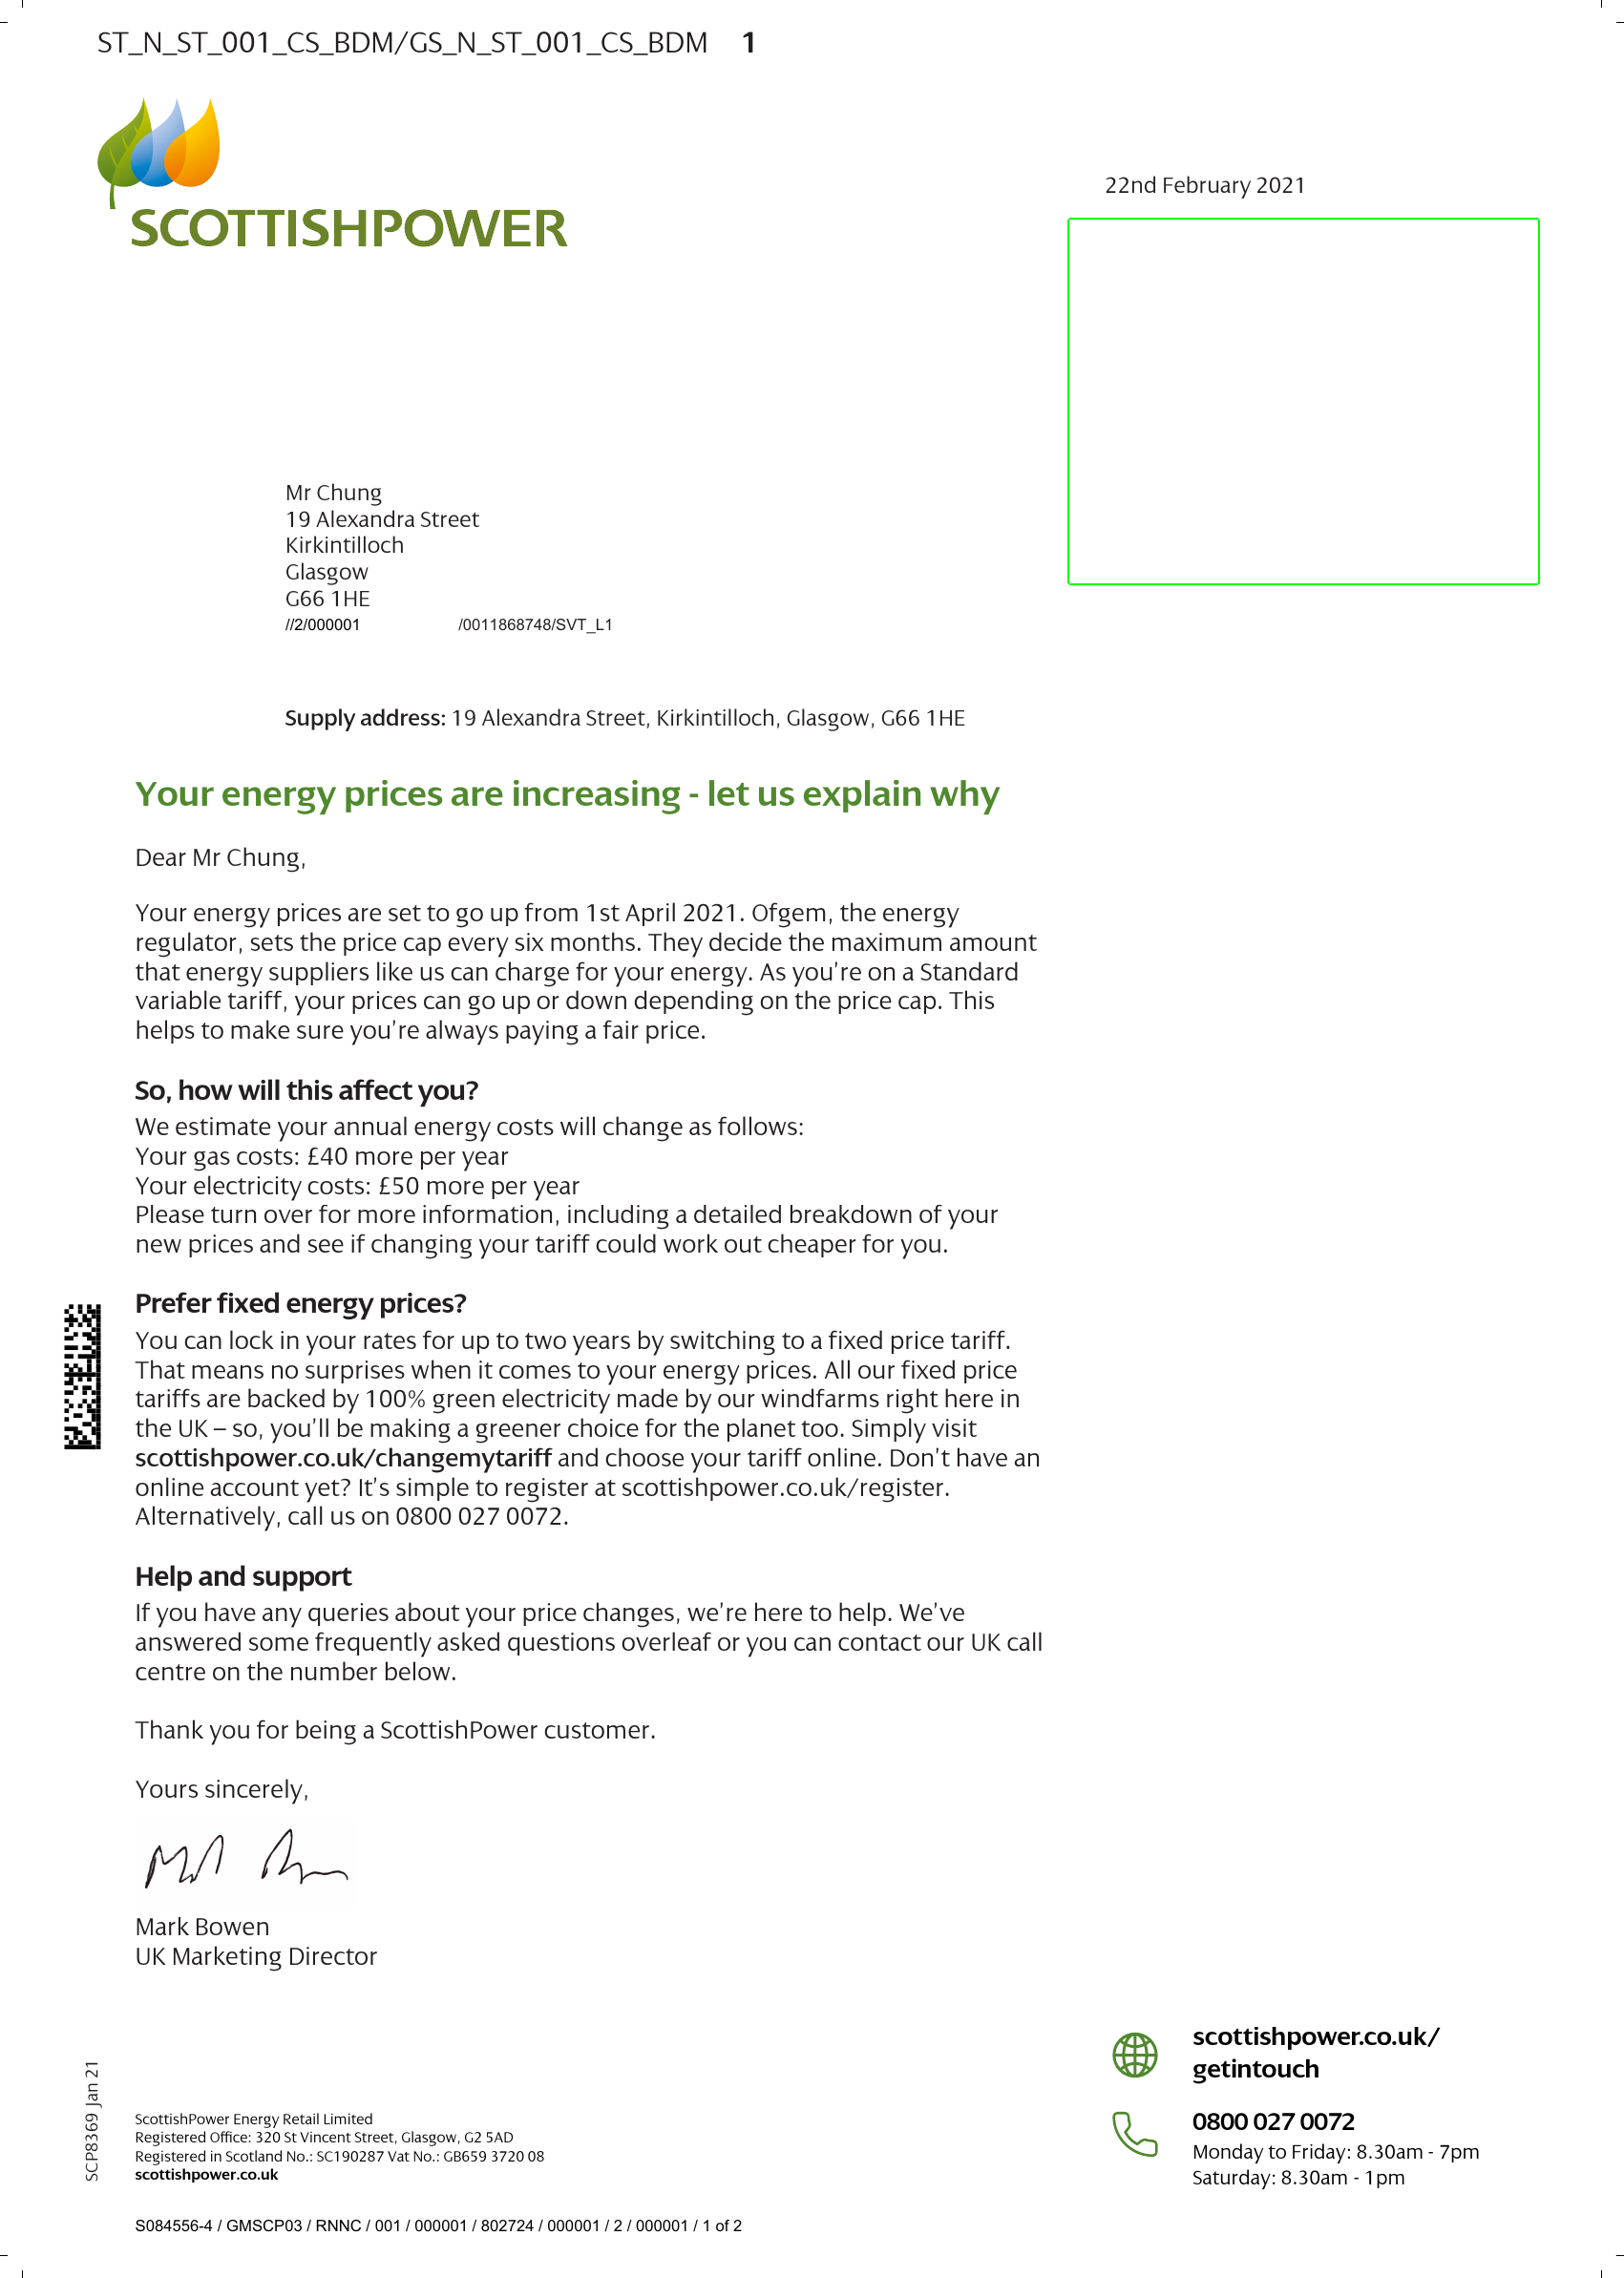

In [29]:
# we could fill in the box on the original image:

filled = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),-1)
# here using white

Image.fromarray(filled)

## contours

In [48]:
# alternatively sections of the image can be selected by working with contours

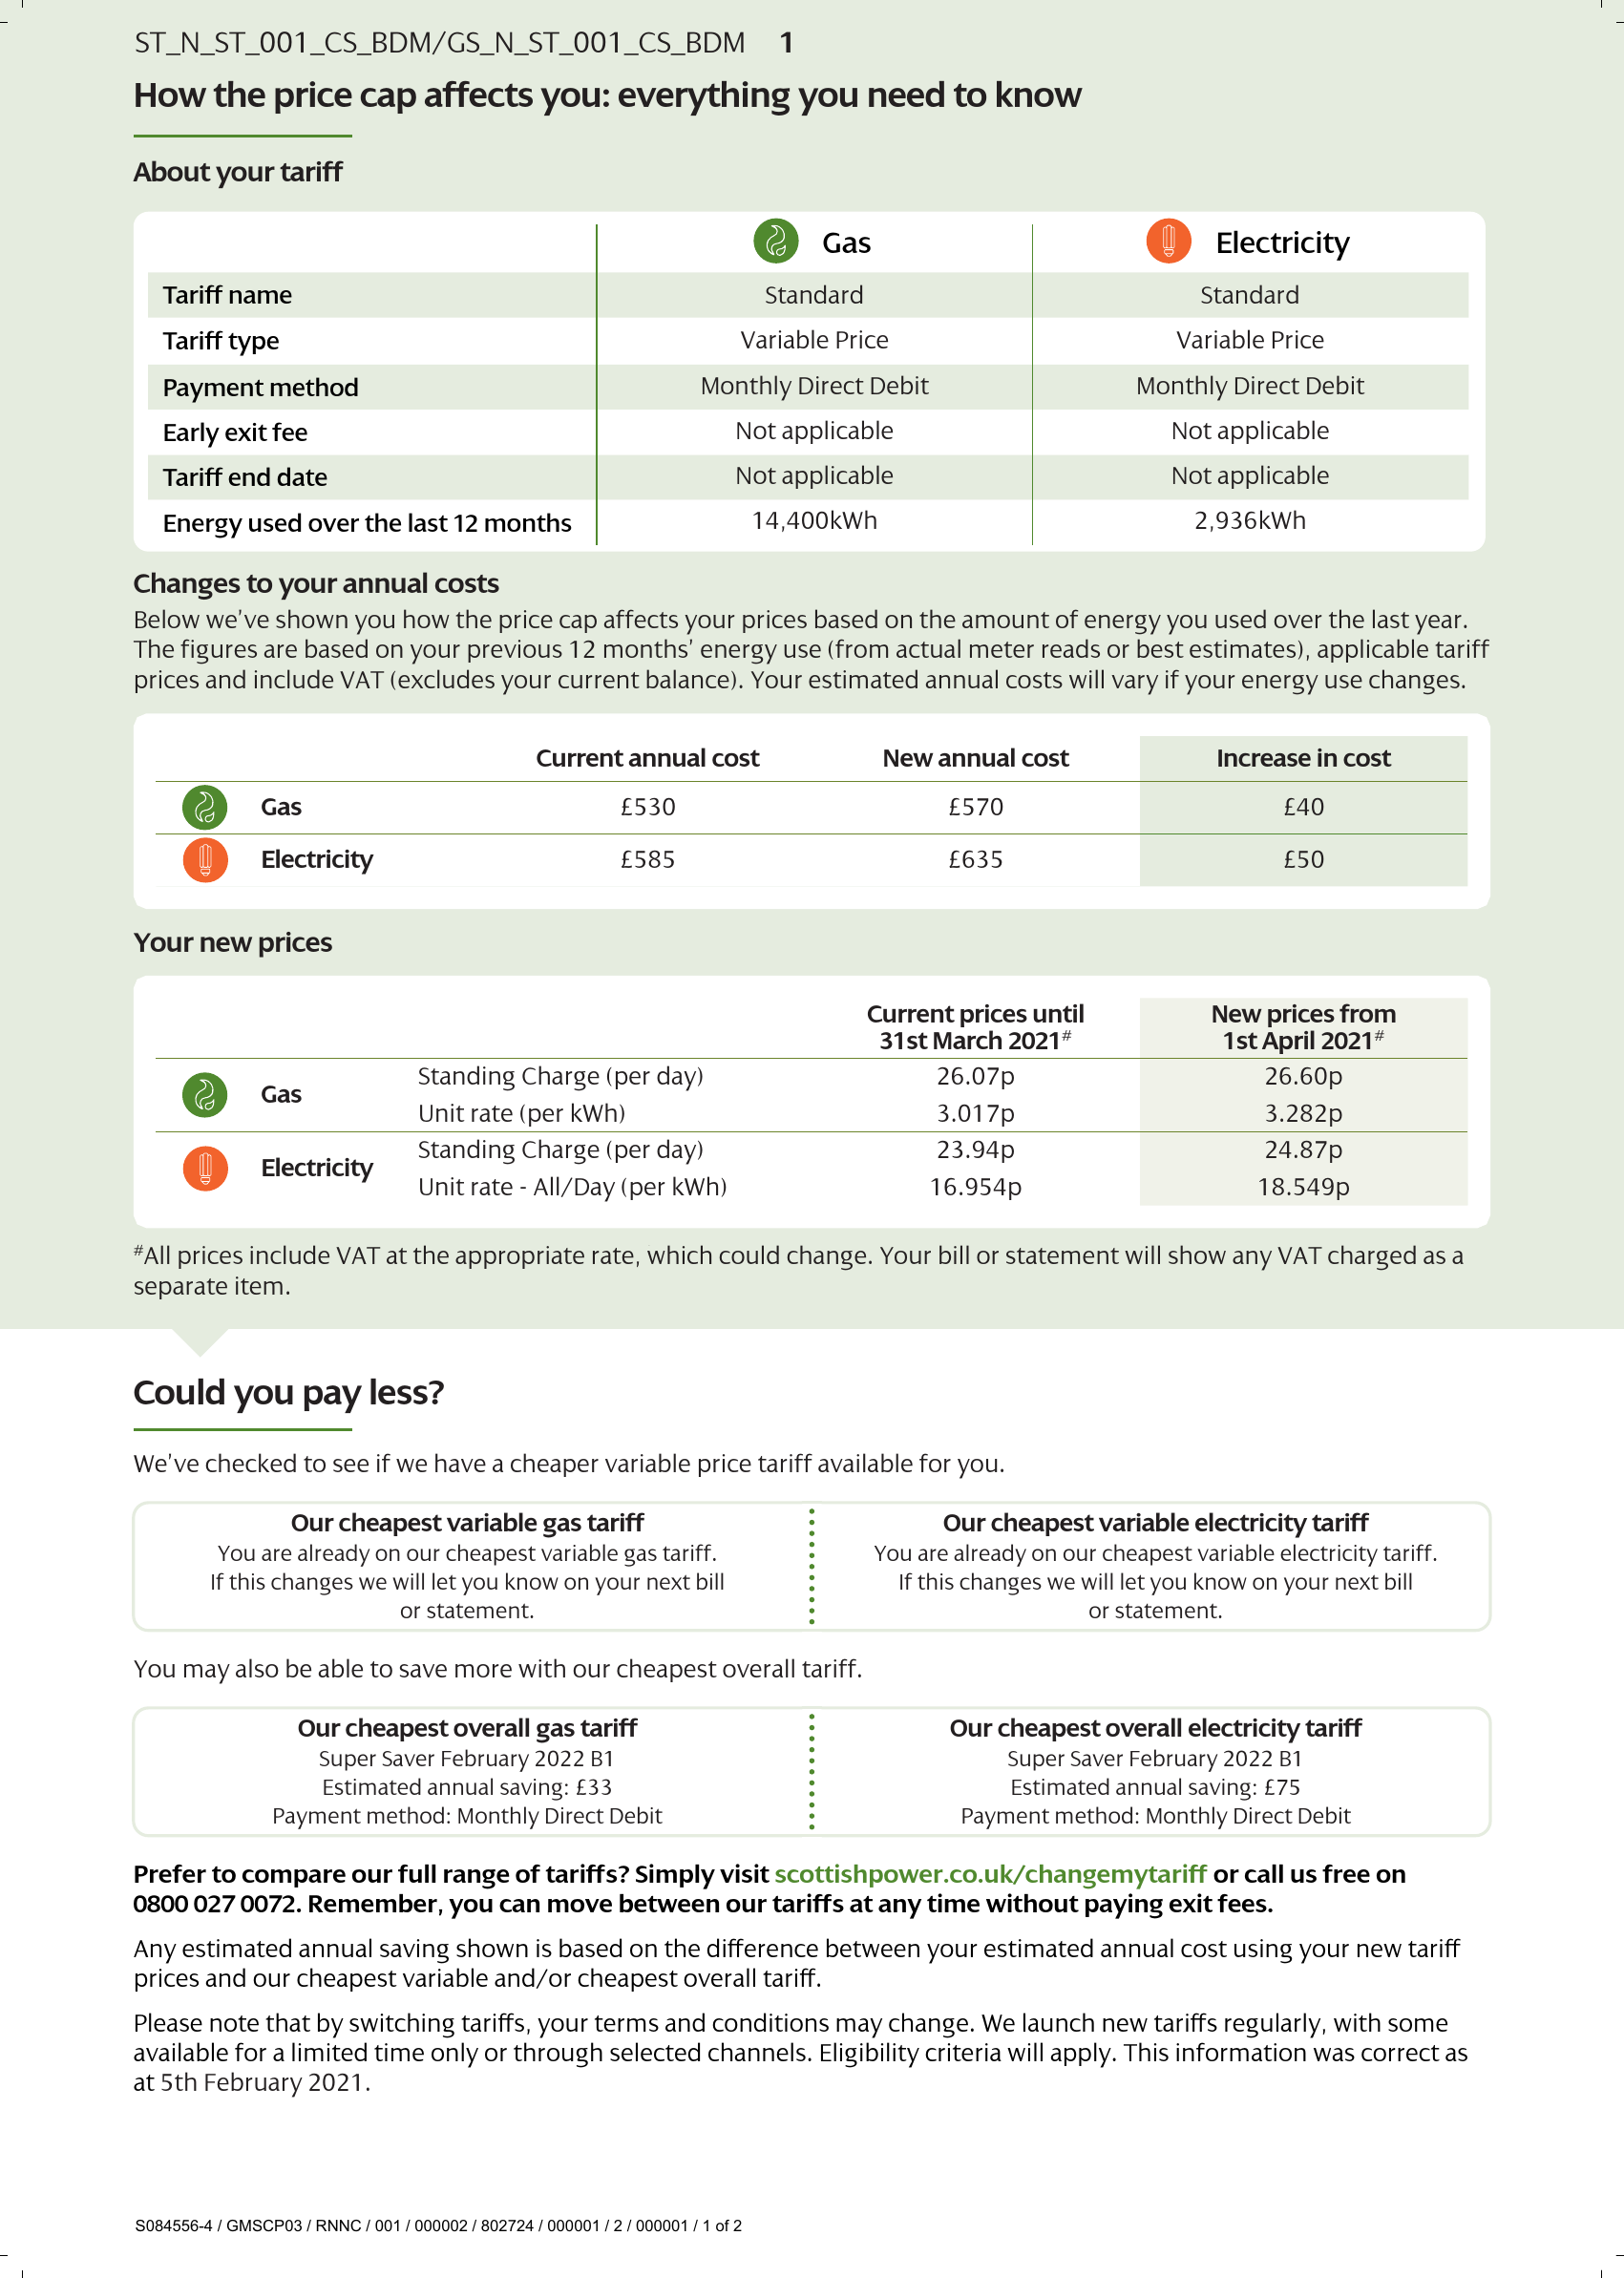

In [49]:
img = np.array(page_images[5])
Image.fromarray(img)

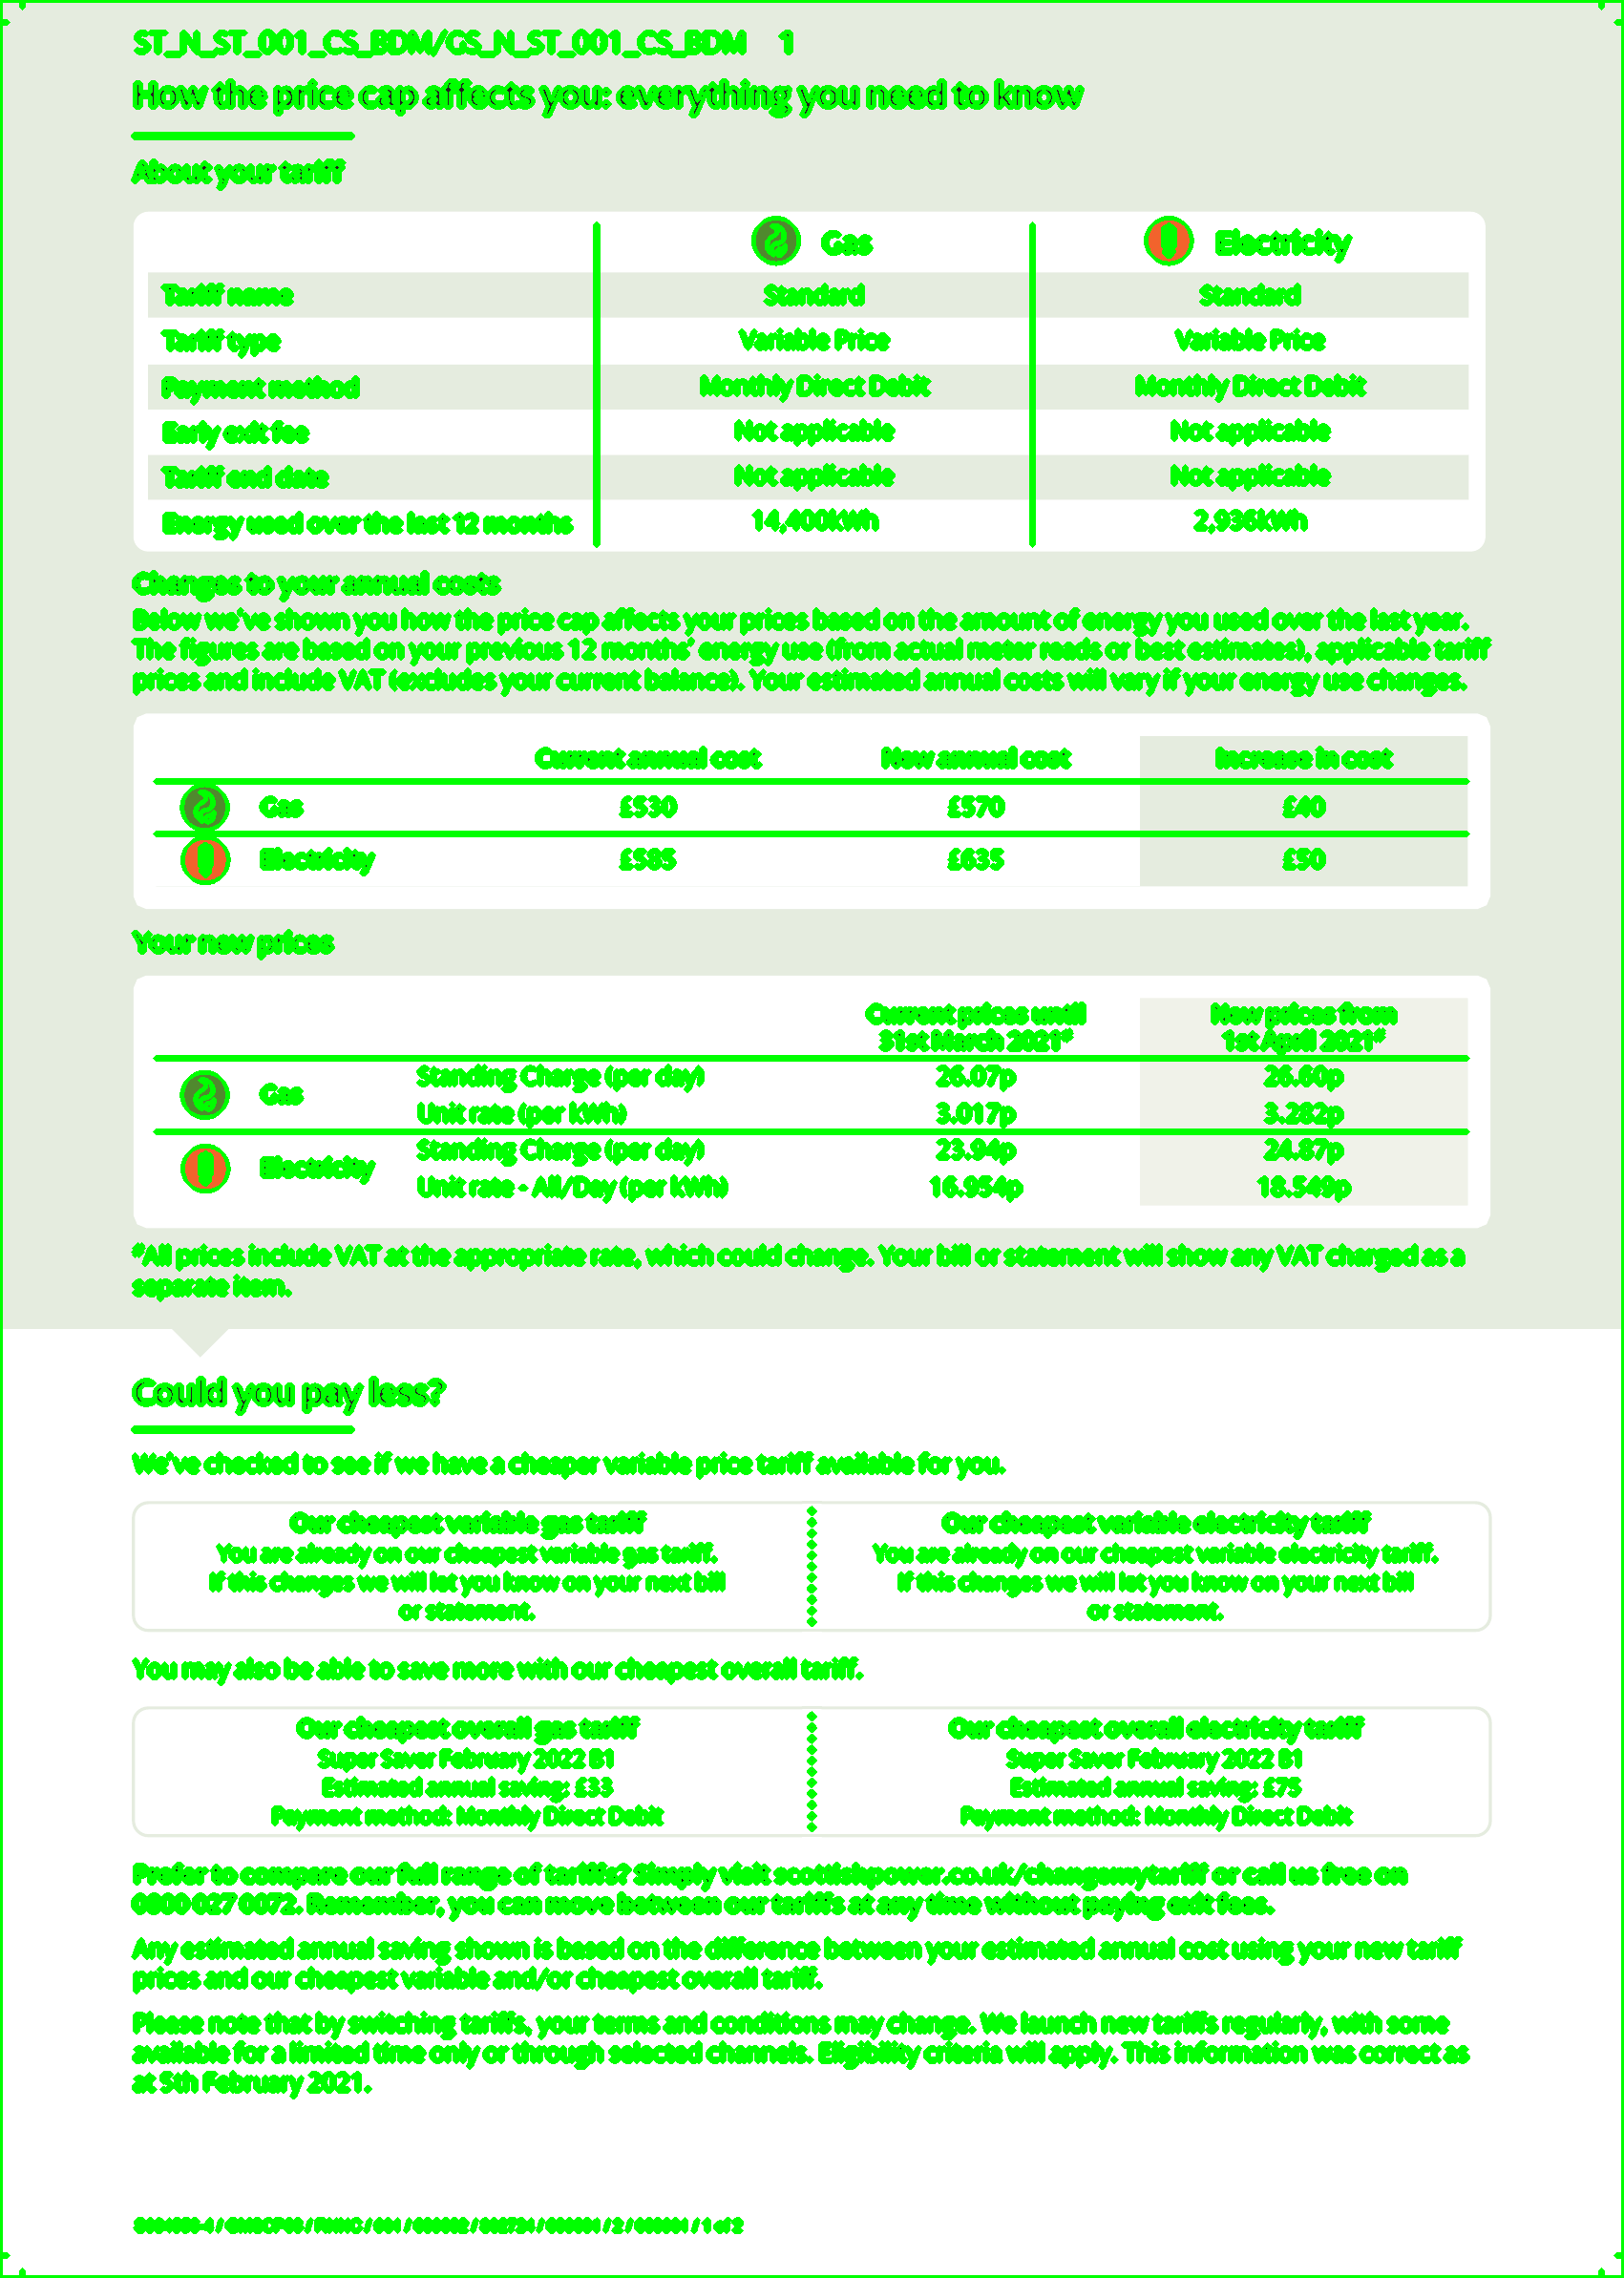

In [50]:
# with detected contours:


imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(imgray,127,255,0)

contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

contoured = cv2.drawContours(img, contours, -1, (0,255,0), 3)

Image.fromarray(contoured)

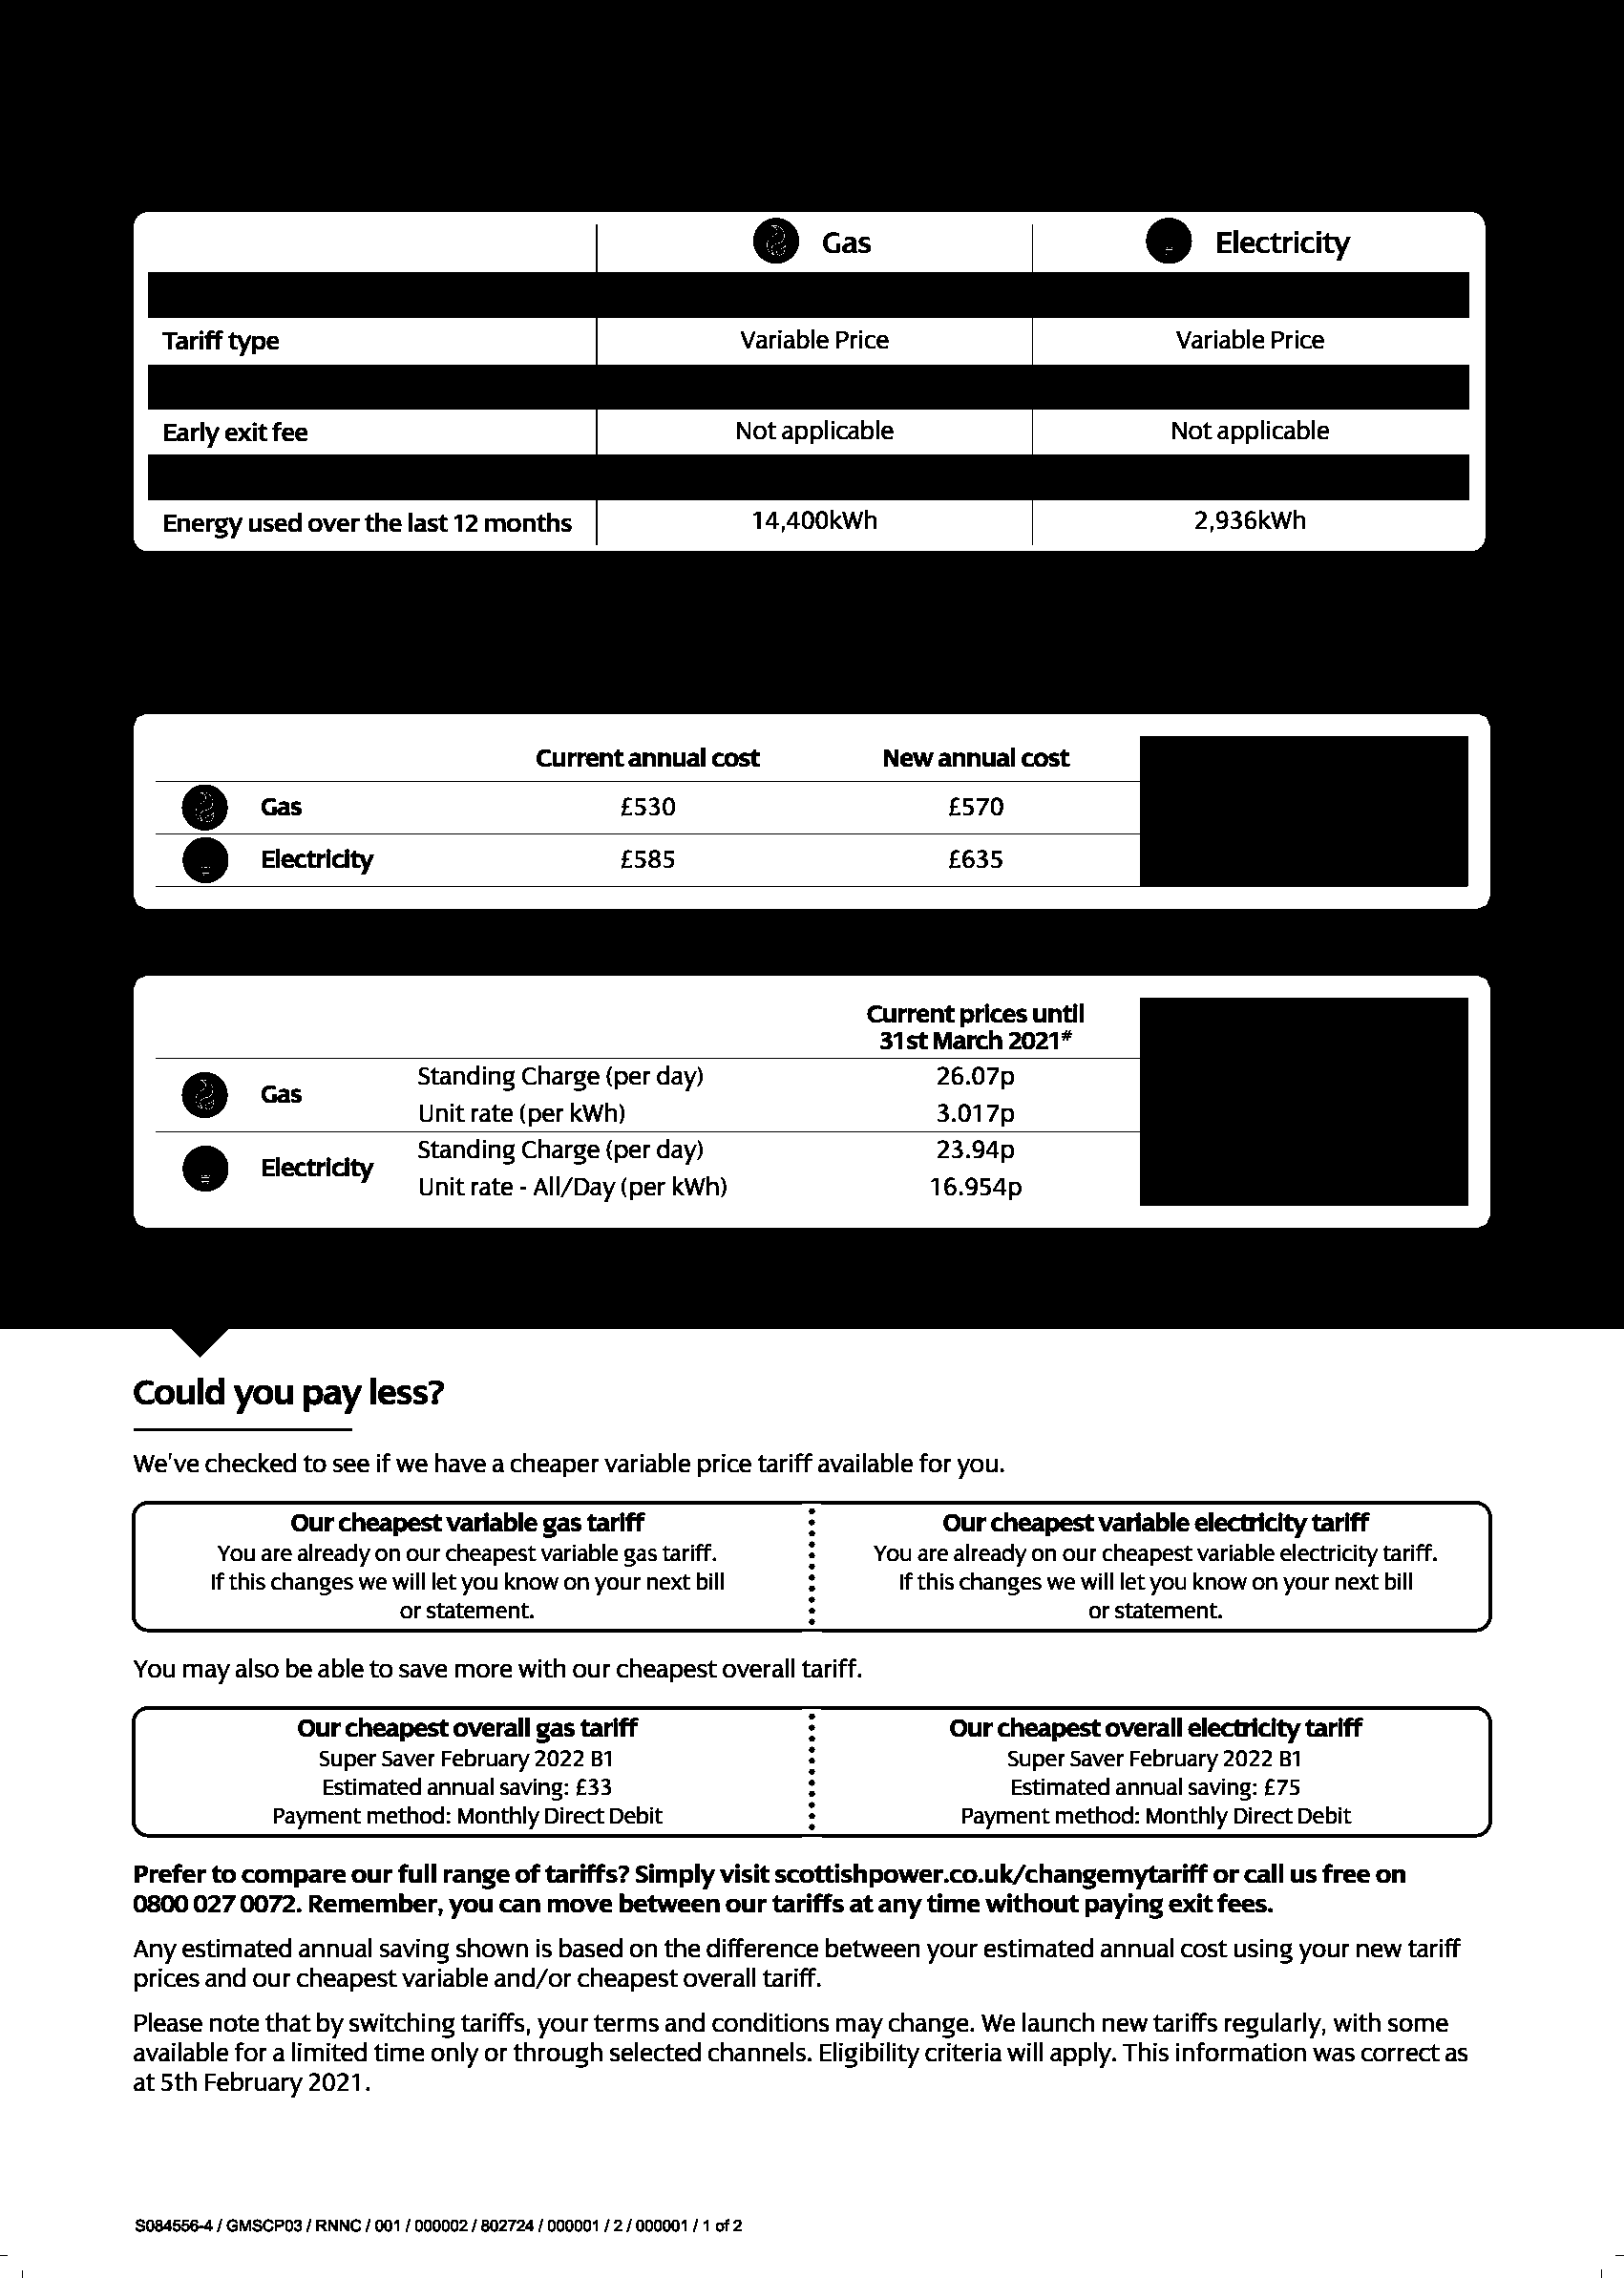

In [54]:
# this is not super useful as is but can be tweaked

# reset image to remove green contours drawn previously
img = np.array(page_images[5])

# If we want to pick out the white boxes around the price tables

# first we use a grey image:
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# we use thresholding to bring contrast to the section of interest
# cv2.threshold arugments(image, boundary pixel value, value to change to, )
ret,thresh = cv2.threshold(imgray,250,255,0)
Image.fromarray(thresh)

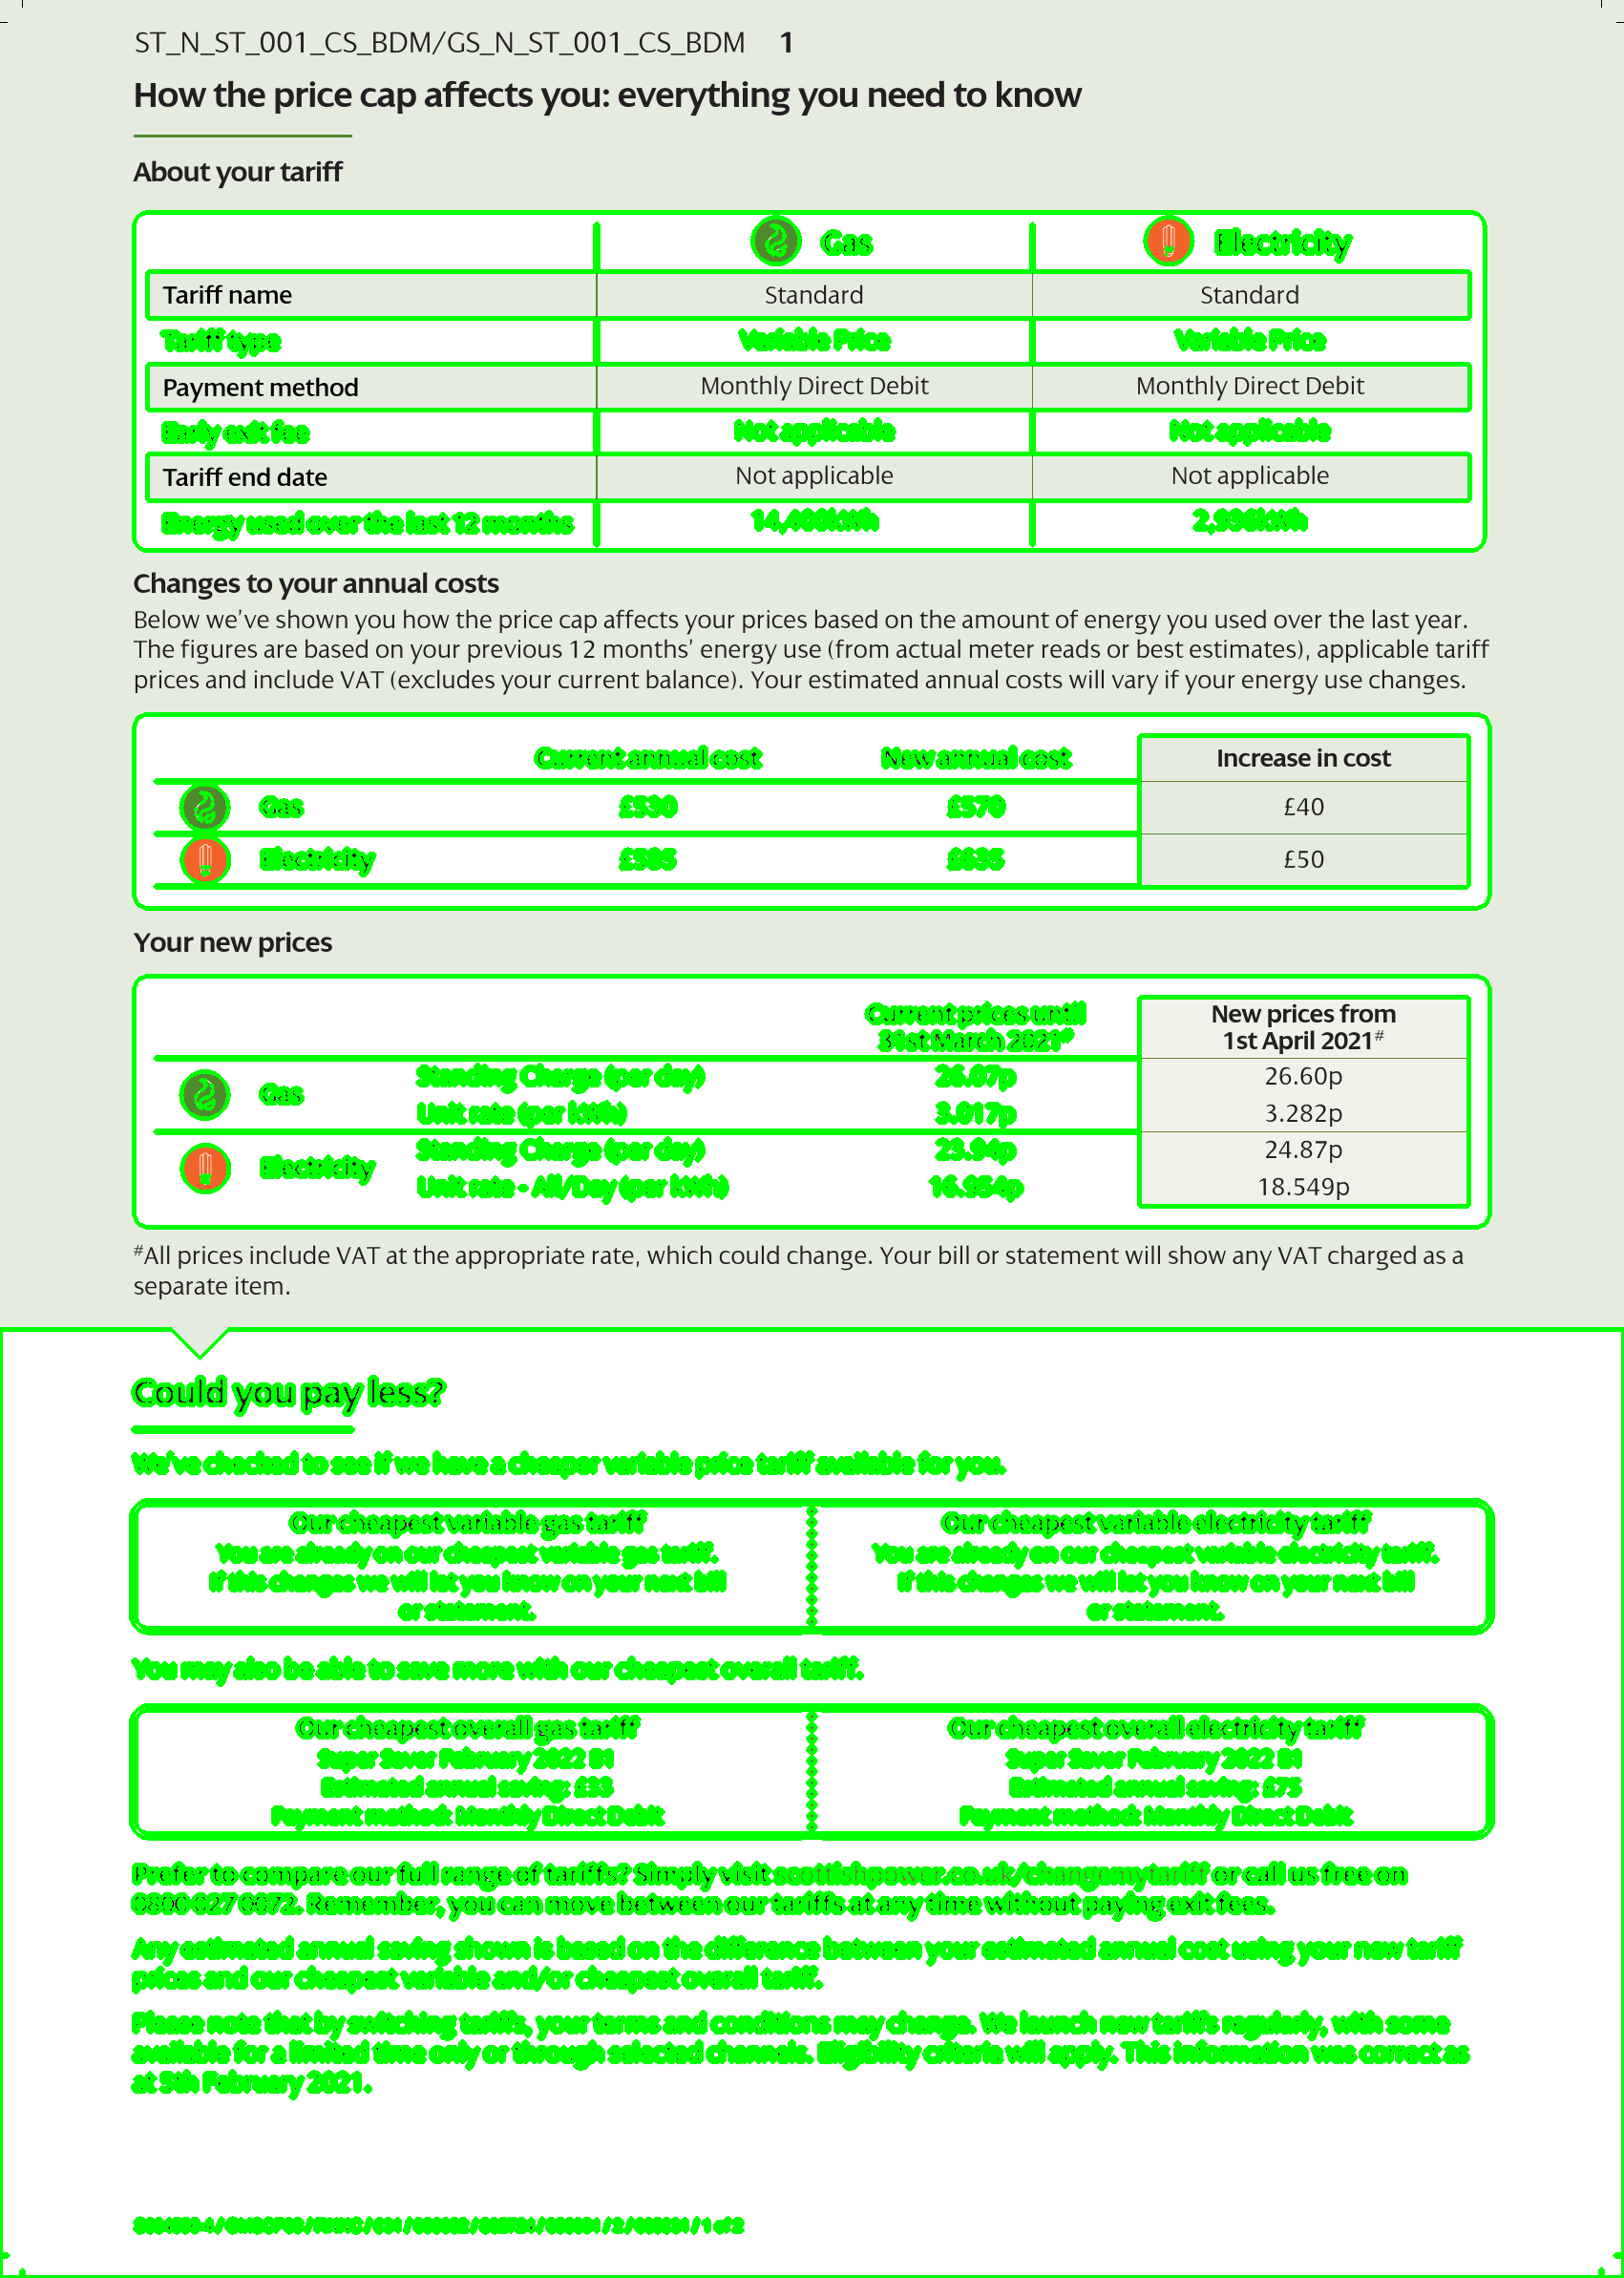

In [55]:
contoured = cv2.drawContours(img, contours, -1, (0,255,0), 3)

Image.fromarray(contoured)

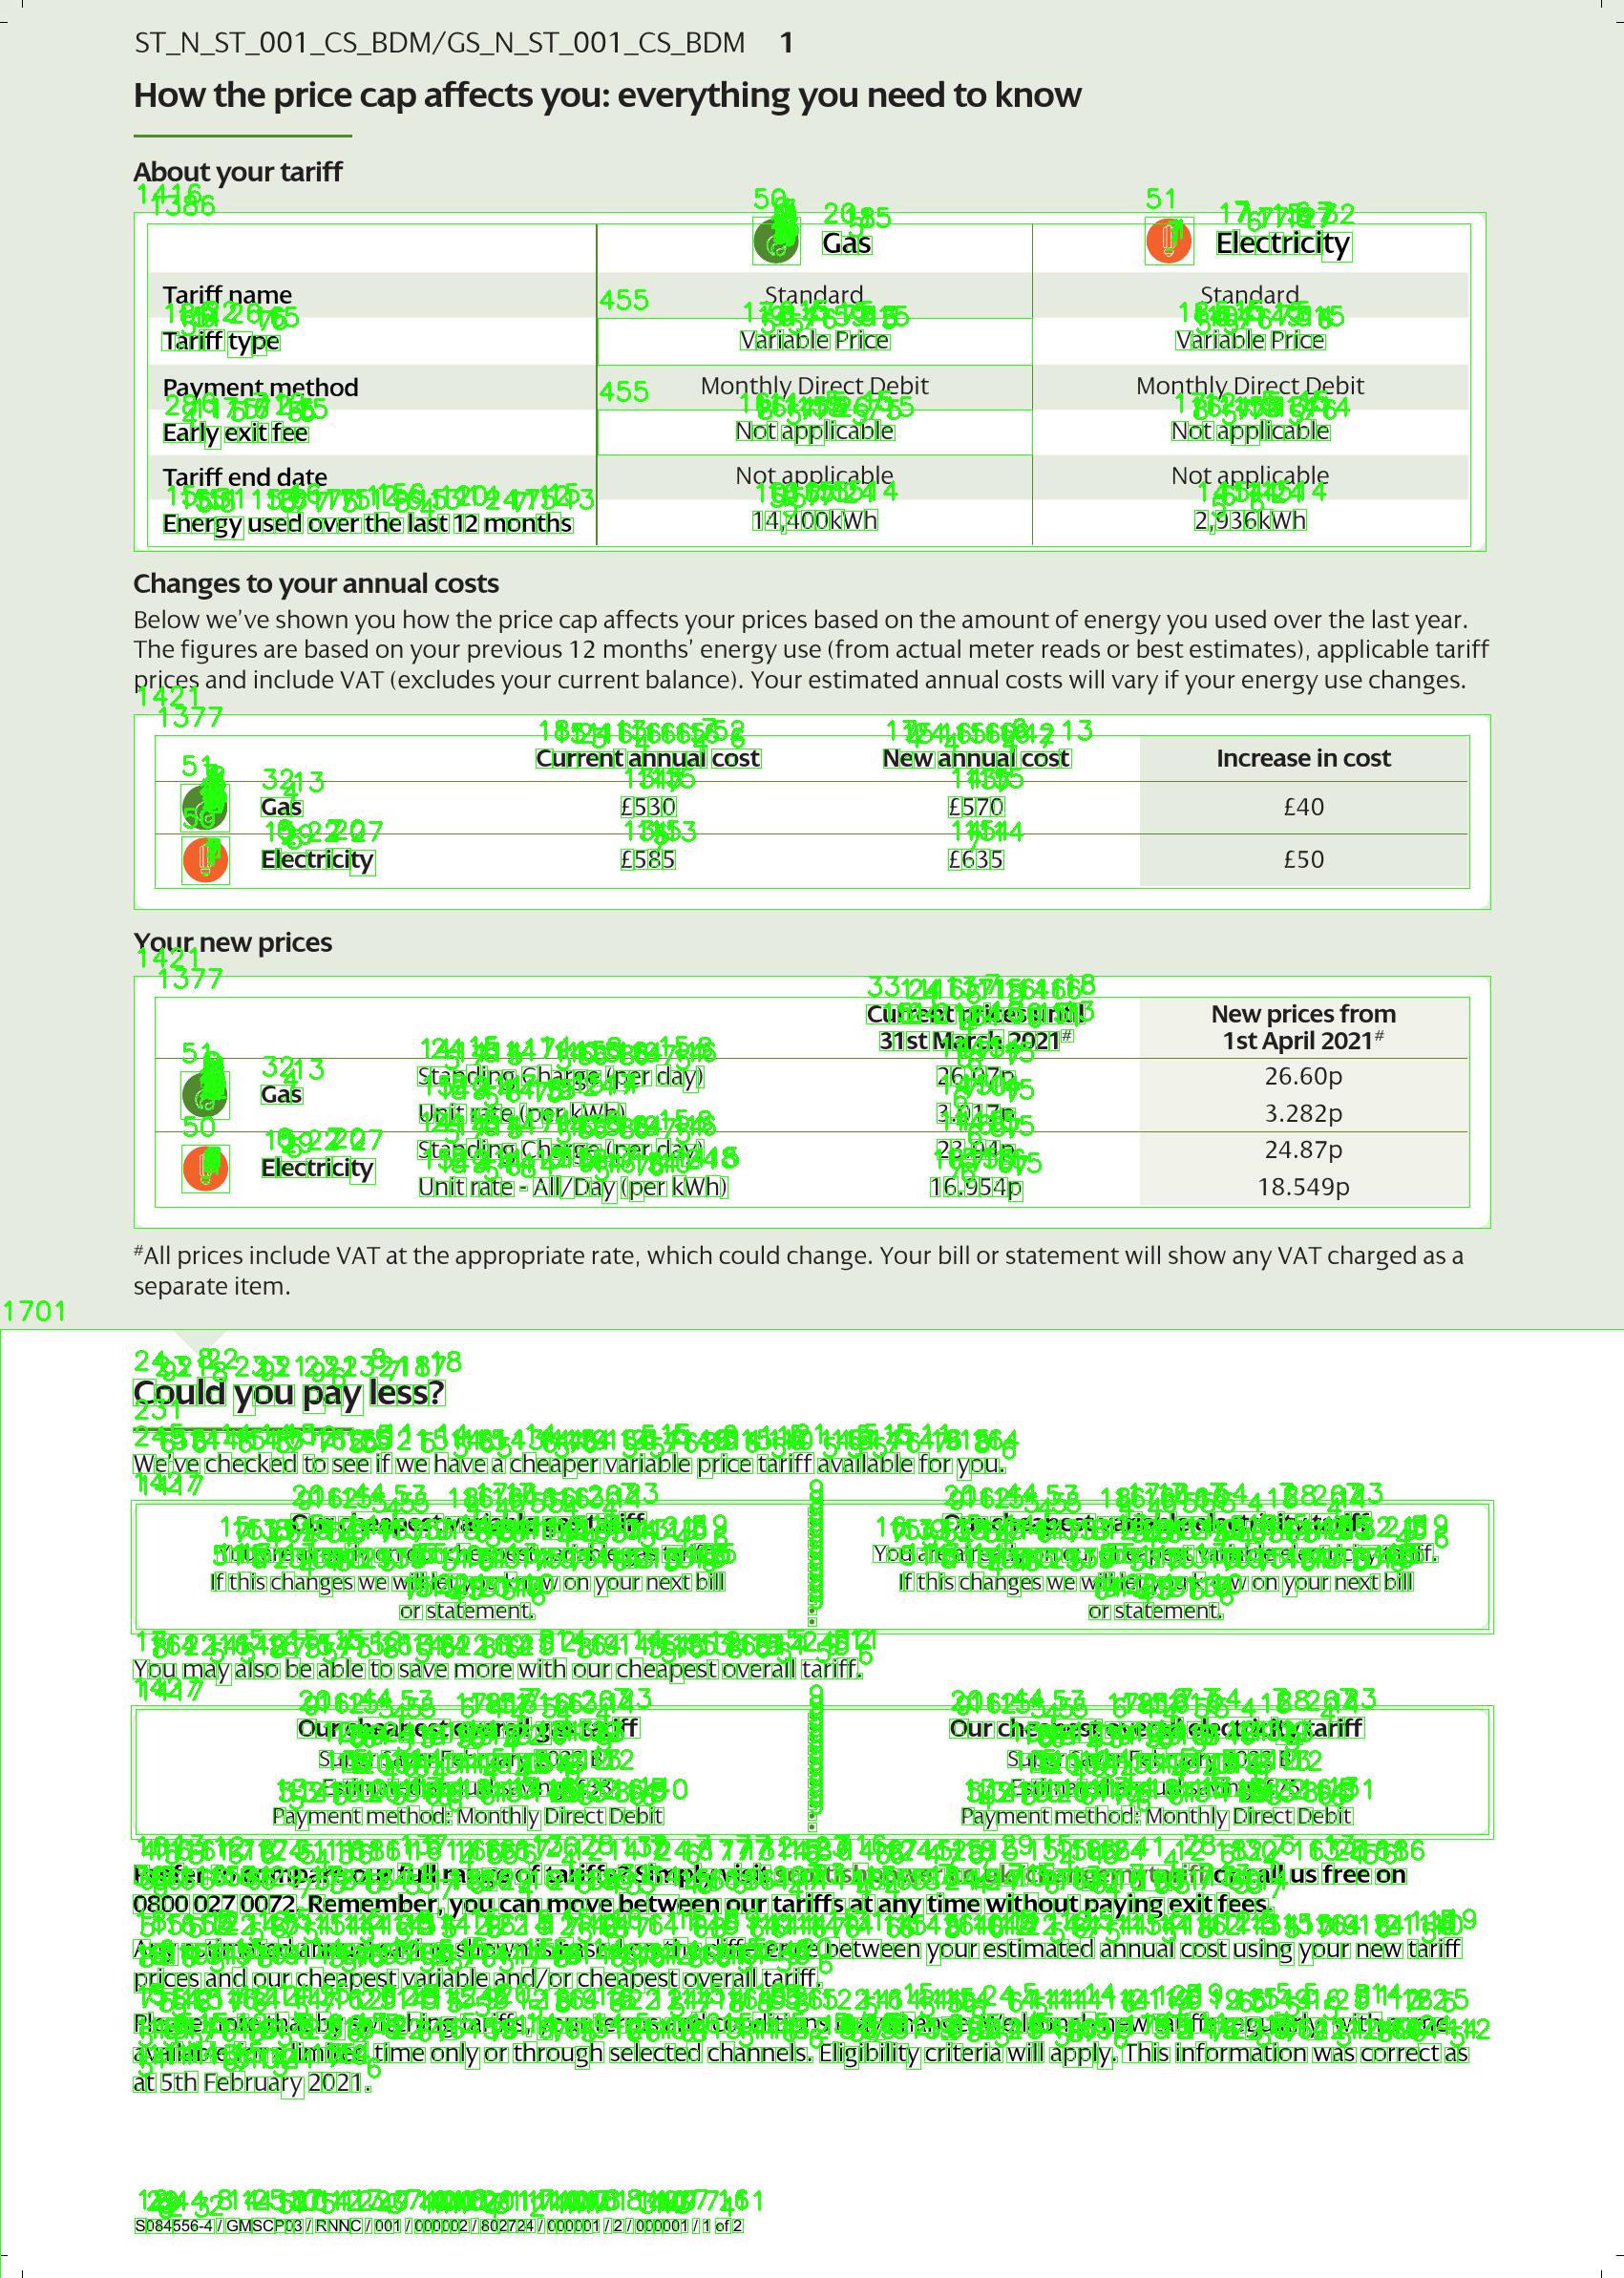

In [56]:
# This is cool, we've got the contours we want, also got a bunch more though

# contours have a bunch of associated properties which we can use to filter out the ones we're not interested in
# let's look at width
img = np.array(page_images[5])

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.putText(img, str(w), (x,y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    cv2.rectangle(img, (x, y), (x + w, y + h), (36,255,12), 1)

Image.fromarray(img)

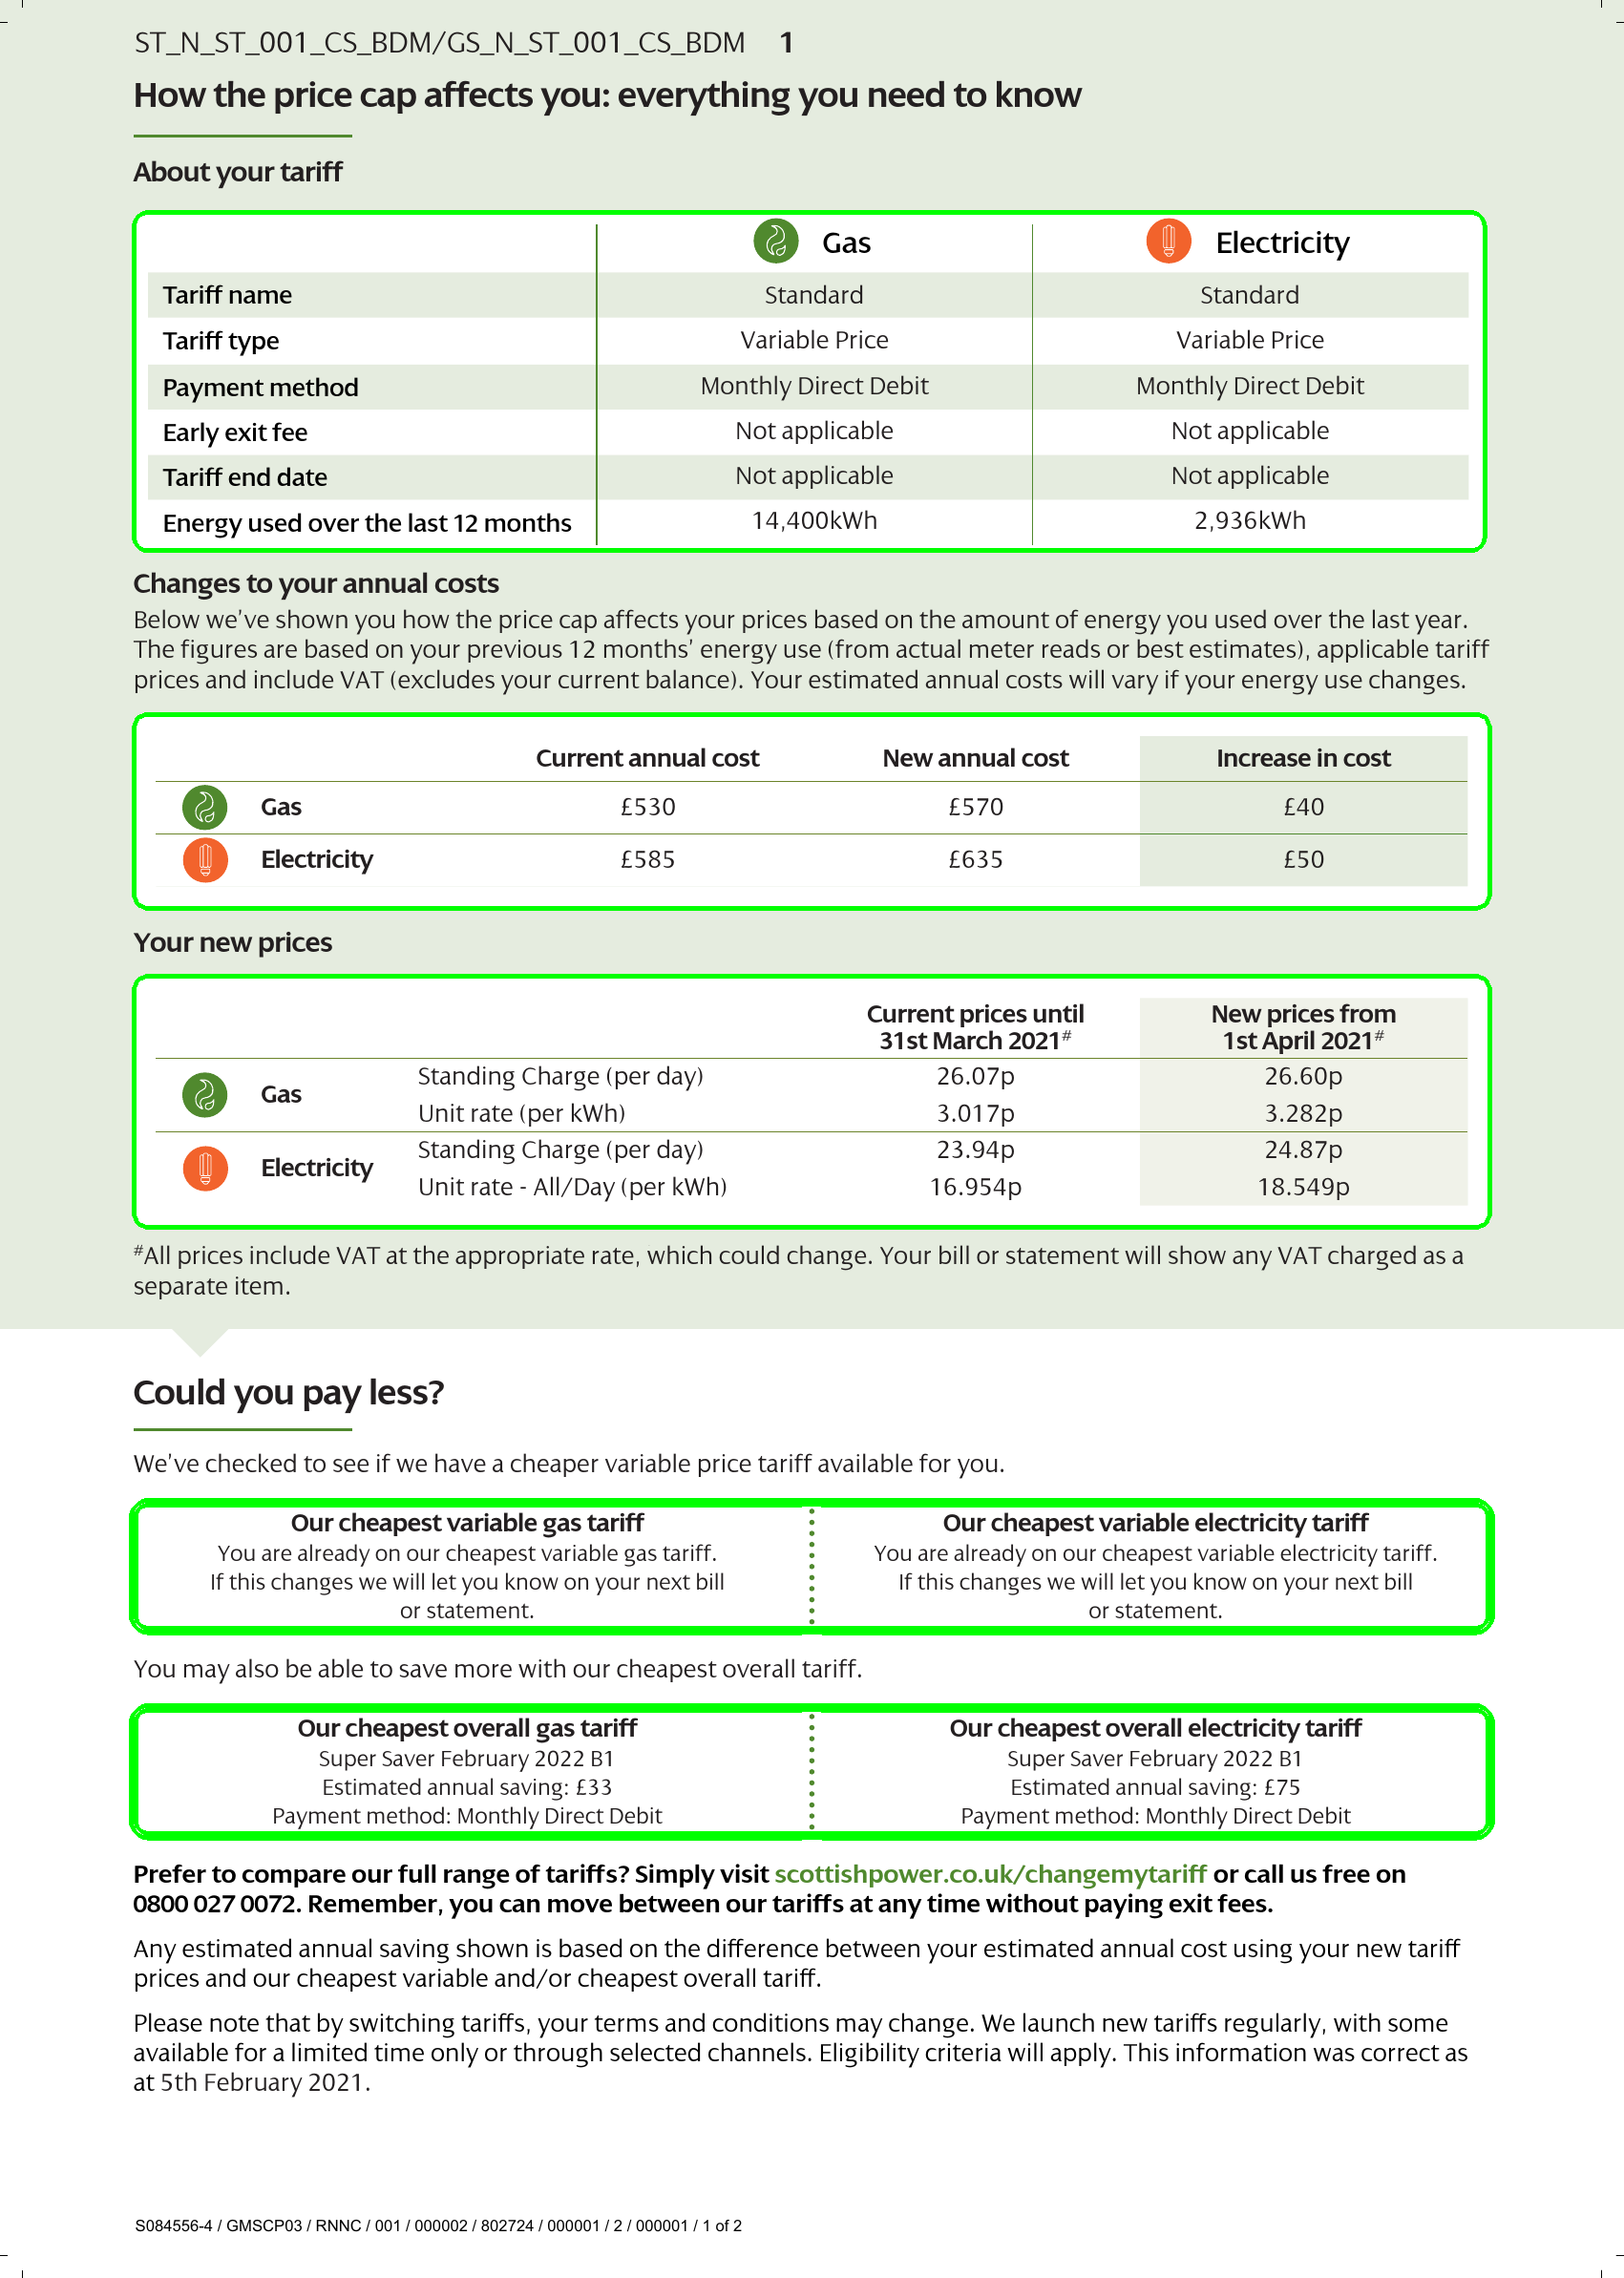

In [57]:
# filter for contours of a certain width:
contours = [c for c in contours if cv2.boundingRect(c)[2]>=1410 and cv2.boundingRect(c)[2]<=1430]

img = np.array(page_images[5])

contoured = cv2.drawContours(img, contours, -1, (0,255,0), 3)

Image.fromarray(contoured)

In [60]:
# So which is which?

# cv2.boundingRect(cont) outputs the x,y,w,h used earlier so can find the y coordinate of top left corner of each contour by

for count, cont in enumerate(contours):
    print(count, cv2.boundingRect(cont)[1])

# mostly it seems contours are ordered from bottom of page up. 
# A wee thing where the bottom two boxes are grey lines filled with white on a white background so each has two contours at each white-grey interface

0 1786
1 1790
2 1571
3 1575
4 1022
5 748
6 222


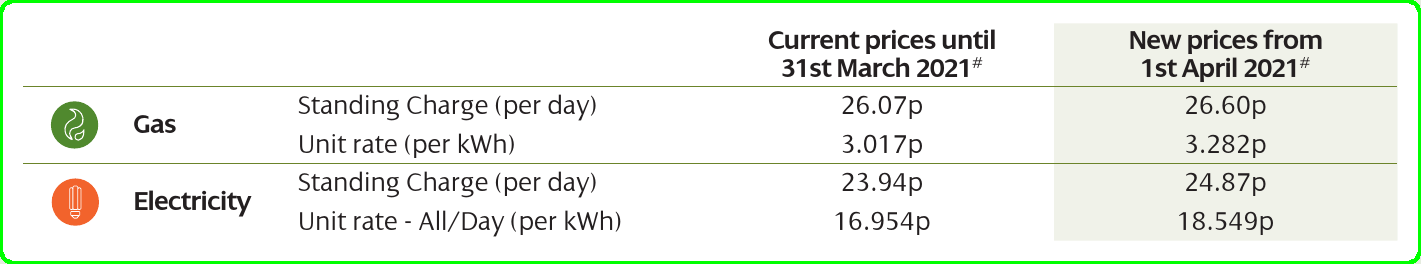

In [62]:
# Anyway, what we can do here is pull everything together and go:

x,y,w,h = cv2.boundingRect(contours[4])

your_new_prices = img[y:y+h, x:x+w]

Image.fromarray(your_new_prices)